### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación

En esta sección analizaremos los datos de facturación de las cuatro tiendas, incluyendo:
- Total de ventas de productos por tienda
- Costos de envío por tienda
- Facturación total (productos + envíos)

Los análisis incluyen visualizaciones para facilitar la comparación entre tiendas.



## Total de Venta de Productos por Tienda

Análisis del monto total de venta de productos, excluyendo los costos de envío.

Total de venta de Productos tienda 1: $1,150,880,400.00
Total de venta de Productos tienda 2: $1,116,343,500.00
Total de venta de Productos tienda 3: $1,098,019,600.00
Total de venta de Productos tienda 4: $1,038,375,700.00


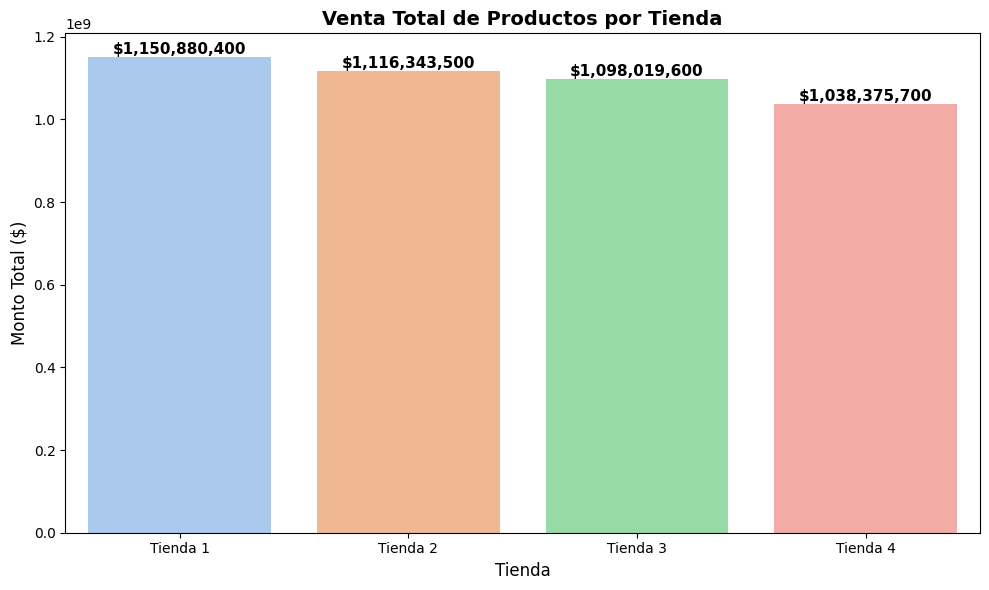

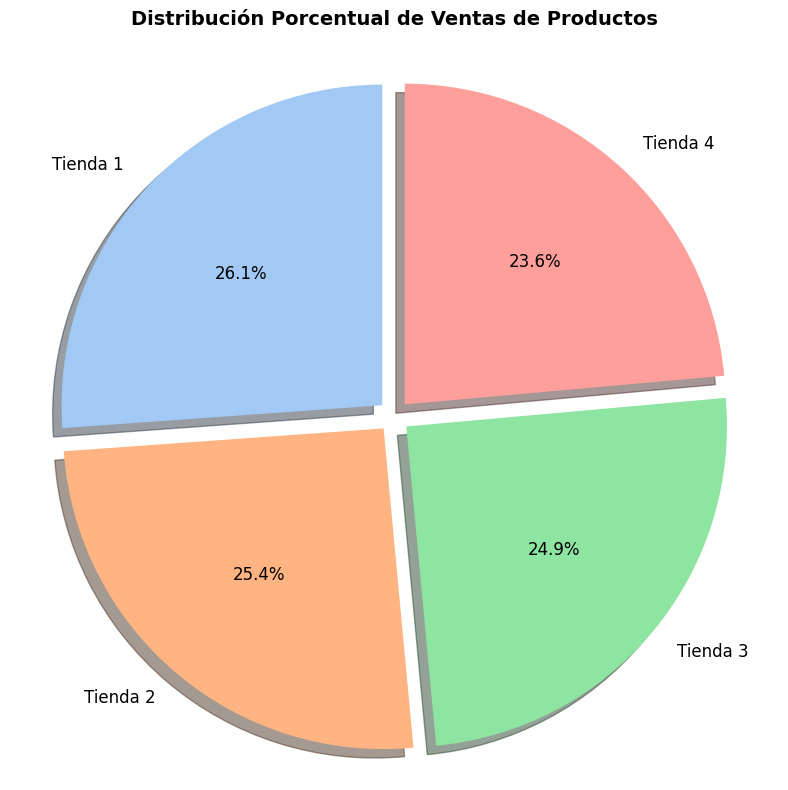


Análisis de ventas de productos:
La tienda con mayor venta de productos es Tienda 1 con $1,150,880,400.00
La tienda con menor venta de productos es Tienda 4 con $1,038,375,700.00
La diferencia entre la mayor y menor venta es $112,504,700.00


In [7]:
# Calcular el total de productos vendidos por tienda
tienda1["total_productos"] = tienda1["Precio"]
tienda2["total_productos"] = tienda2["Precio"]
tienda3["total_productos"] = tienda3["Precio"]
tienda4["total_productos"] = tienda4["Precio"]

# Calcular la suma total de productos vendidos por tienda
total_productos1 = tienda1["total_productos"].sum()
total_productos2 = tienda2["total_productos"].sum()
total_productos3 = tienda3["total_productos"].sum()
total_productos4 = tienda4["total_productos"].sum()

print(f"Total de venta de Productos tienda 1: ${total_productos1:,.2f}")
print(f"Total de venta de Productos tienda 2: ${total_productos2:,.2f}")
print(f"Total de venta de Productos tienda 3: ${total_productos3:,.2f}")
print(f"Total de venta de Productos tienda 4: ${total_productos4:,.2f}")

# Crear un DataFrame para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

ventas_productos = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Venta Total": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
    }
)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda", y="Venta Total", data=ventas_productos, hue="Tienda", legend=False
)
plt.title("Venta Total de Productos por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${ventas_productos["Venta Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la distribución porcentual de ventas por tienda
total_ventas_productos = (
    total_productos1 + total_productos2 + total_productos3 + total_productos4
)
porcentajes = [
    total_productos1 / total_ventas_productos * 100,
    total_productos2 / total_ventas_productos * 100,
    total_productos3 / total_ventas_productos * 100,
    total_productos4 / total_ventas_productos * 100,
]

# Gráfico de pastel para mostrar la participación porcentual
plt.figure(figsize=(8, 8))
plt.pie(
    porcentajes,
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de Ventas de Productos",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de ventas de productos:\n" + "=" * 30)
tienda_mayor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_productos1, total_productos2, total_productos3, total_productos4])
]
tienda_menor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_productos1, total_productos2, total_productos3, total_productos4])
]
venta_mayor = max(
    total_productos1, total_productos2, total_productos3, total_productos4
)
venta_menor = min(
    total_productos1, total_productos2, total_productos3, total_productos4
)

print(
    f"La tienda con mayor venta de productos es {tienda_mayor_venta} con ${venta_mayor:,.2f}"
)
print(
    f"La tienda con menor venta de productos es {tienda_menor_venta} con ${venta_menor:,.2f}"
)
print(
    f"La diferencia entre la mayor y menor venta es ${(venta_mayor - venta_menor):,.2f}"
)

## Costos de Envío por Tienda

Análisis de los costos de envío generados por cada tienda, que representan un componente importante de la facturación total.

Total de envío de Productos de tienda 1: $61,377,900.00
Total de envío de Productos de tienda 2: $59,485,100.00
Total de envío de Productos de tienda 3: $58,516,600.00
Total de envío de Productos de tienda 4: $55,317,400.00


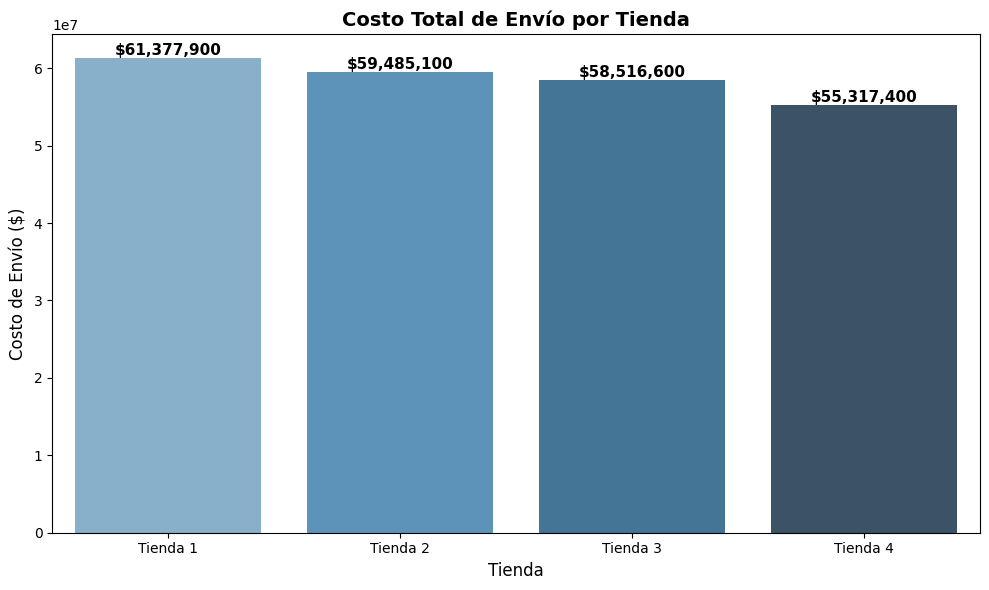

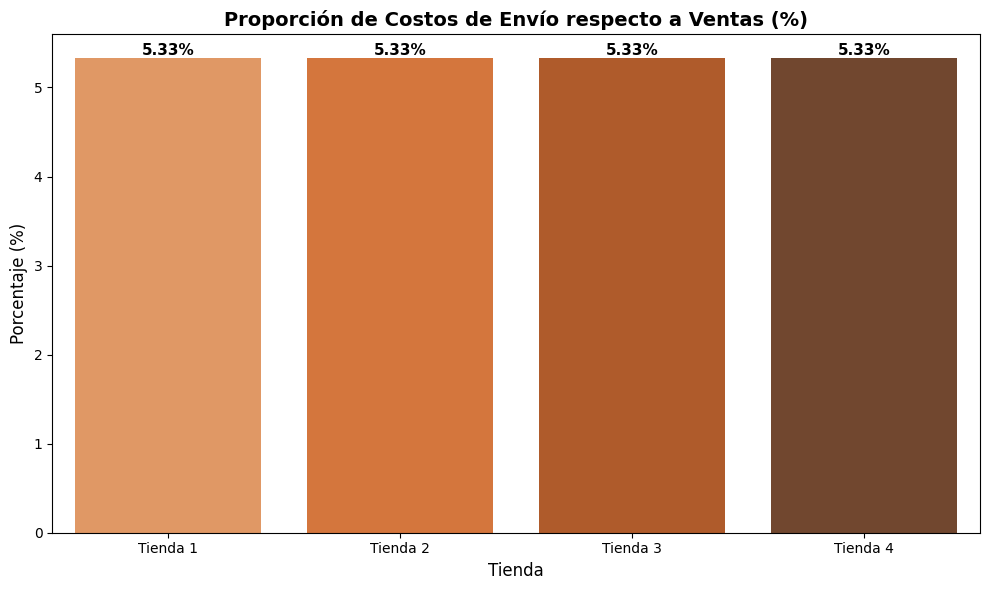


Análisis de costos de envío:
La tienda con mayor costo de envío es Tienda 1 con $61,377,900.00
La tienda con menor costo de envío es Tienda 4 con $55,317,400.00
La tienda con mayor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%
La tienda con menor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%


In [8]:
# Calculando los costos de envío para cada tienda
tienda1["total_envio"] = tienda1["Costo de envío"]
tienda2["total_envio"] = tienda2["Costo de envío"]
tienda3["total_envio"] = tienda3["Costo de envío"]
tienda4["total_envio"] = tienda4["Costo de envío"]

# Suma total de costos de envío por tienda
total_envio1 = tienda1["total_envio"].sum()
total_envio2 = tienda2["total_envio"].sum()
total_envio3 = tienda3["total_envio"].sum()
total_envio4 = tienda4["total_envio"].sum()

print(f"Total de envío de Productos de tienda 1: ${total_envio1:,.2f}")
print(f"Total de envío de Productos de tienda 2: ${total_envio2:,.2f}")
print(f"Total de envío de Productos de tienda 3: ${total_envio3:,.2f}")
print(f"Total de envío de Productos de tienda 4: ${total_envio4:,.2f}")

# Crear un DataFrame para la visualización
envios = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Costo Total de Envío": [
            total_envio1,
            total_envio2,
            total_envio3,
            total_envio4,
        ],
    }
)

# Gráfico de barras para costos de envío
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Costo Total de Envío",
    data=envios,
    hue="Tienda",
    palette="Blues_d",
    legend=False,
)
plt.title("Costo Total de Envío por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${envios["Costo Total de Envío"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Calculando la proporción de costos de envío respecto al precio de productos
envios["Venta de Productos"] = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
envios["Proporción Envío/Venta"] = (
    envios["Costo Total de Envío"] / envios["Venta de Productos"] * 100
).round(2)

# Gráfico de barras para mostrar la proporción envío/venta
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Proporción Envío/Venta",
    data=envios,
    hue="Tienda",
    palette="Oranges_d",
    legend=False,
)
plt.title(
    "Proporción de Costos de Envío respecto a Ventas (%)",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{envios["Proporción Envío/Venta"][i]:.2f}%',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de costos de envío:\n" + "=" * 30)
tienda_mayor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_menor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_mayor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax(envios["Proporción Envío/Venta"])
]
tienda_menor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin(envios["Proporción Envío/Venta"])
]

print(
    f"La tienda con mayor costo de envío es {tienda_mayor_envio} con ${max(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con menor costo de envío es {tienda_menor_envio} con ${min(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con mayor proporción de costos de envío respecto a ventas es {tienda_mayor_prop} con {max(envios['Proporción Envío/Venta']):.2f}%"
)
print(
    f"La tienda con menor proporción de costos de envío respecto a ventas es {tienda_menor_prop} con {min(envios['Proporción Envío/Venta']):.2f}%"
)

## Facturación Total por Tienda (Productos + Envíos)

Análisis de la facturación total que incluye tanto el valor de los productos como los costos de envío asociados.

Total facturación tienda 1: $1,212,258,300.00
Total facturación tienda 2: $1,175,828,600.00
Total facturación tienda 3: $1,156,536,200.00
Total facturación tienda 4: $1,093,693,100.00
Total facturación global: $4,638,316,200.00


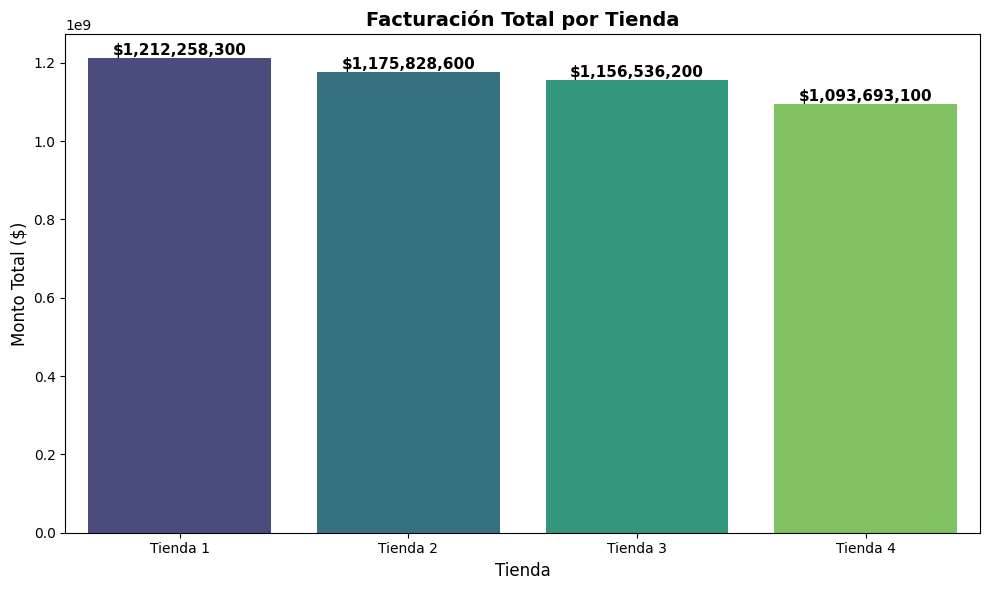

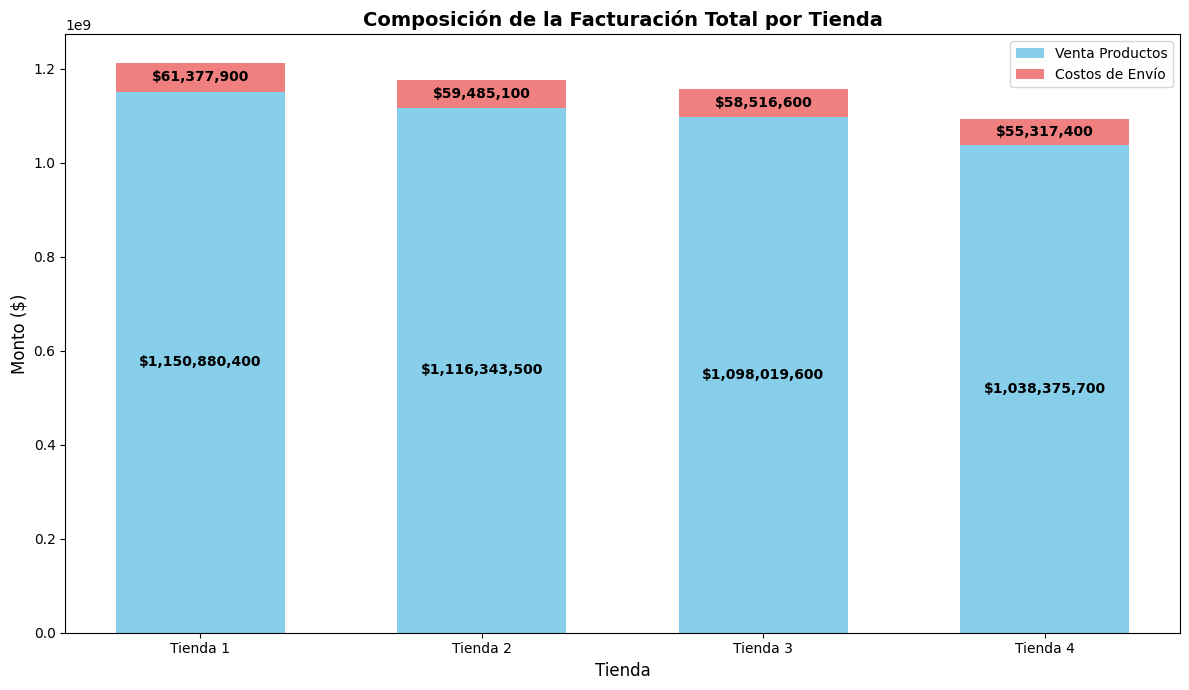

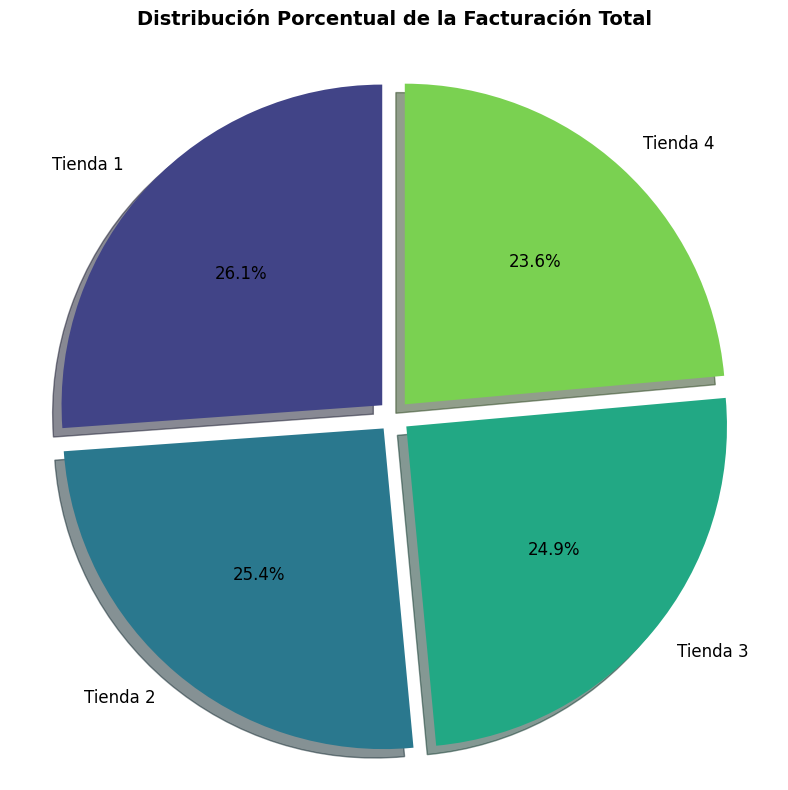


Análisis de facturación total:
La tienda con mayor facturación total es Tienda 1 con $1,212,258,300.00 (26.1% del total)
La tienda con menor facturación total es Tienda 4 con $1,093,693,100.00 (23.6% del total)
La diferencia entre la mayor y menor facturación es $118,565,200.00
La facturación promedio por tienda es $1,159,579,050.00


In [9]:
# Calculate the total for each dataframe by summing 'Precio' and 'Costo de envío'
tienda1["total"] = tienda1["Precio"] + tienda1["Costo de envío"]
tienda2["total"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["total"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["total"] = tienda4["Precio"] + tienda4["Costo de envío"]

# Compute the total sum for each dataframe
total1 = tienda1["total"].sum()
total2 = tienda2["total"].sum()
total3 = tienda3["total"].sum()
total4 = tienda4["total"].sum()

print(f"Total facturación tienda 1: ${total1:,.2f}")
print(f"Total facturación tienda 2: ${total2:,.2f}")
print(f"Total facturación tienda 3: ${total3:,.2f}")
print(f"Total facturación tienda 4: ${total4:,.2f}")
print(f"Total facturación global: ${(total1 + total2 + total3 + total4):,.2f}")

# Crear un DataFrame para la visualización
facturacion_total = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Facturación Total": [total1, total2, total3, total4],
        "Venta Productos": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
        "Costos de Envío": [total_envio1, total_envio2, total_envio3, total_envio4],
    }
)

# Gráfico de barras para facturación total
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Facturación Total",
    data=facturacion_total,
    hue="Tienda",
    palette="viridis",
    legend=False,
)
plt.title("Facturación Total por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${facturacion_total["Facturación Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para mostrar la composición de la facturación
plt.figure(figsize=(12, 7))

# Preparar datos para barras apiladas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_productos = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
facturacion_envios = [total_envio1, total_envio2, total_envio3, total_envio4]

# Crear gráfico de barras apiladas
bar_width = 0.6
indices = np.arange(len(tiendas))

p1 = plt.bar(
    indices, facturacion_productos, bar_width, label="Venta Productos", color="skyblue"
)
p2 = plt.bar(
    indices,
    facturacion_envios,
    bar_width,
    bottom=facturacion_productos,
    label="Costos de Envío",
    color="lightcoral",
)

# Añadir etiquetas y título
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto ($)", fontsize=12)
plt.title(
    "Composición de la Facturación Total por Tienda", fontsize=14, fontweight="bold"
)
plt.xticks(indices, tiendas)
plt.legend(loc="upper right")

# Añadir etiquetas de valores dentro de las barras
for i, bar in enumerate(p1):
    height = bar.get_height()
    if height > 100000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height / 2,
            f"${facturacion_productos[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

for i, bar in enumerate(p2):
    height = bar.get_height()
    bottom = bar.get_y()
    if height > 50000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bottom + height / 2,
            f"${facturacion_envios[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

plt.tight_layout()
plt.show()

# Gráfico de pastel para mostrar la distribución de la facturación total
plt.figure(figsize=(8, 8))
plt.pie(
    [total1, total2, total3, total4],
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    colors=sns.color_palette("viridis", 4),
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de la Facturación Total",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de facturación total:\n" + "=" * 30)
tienda_mayor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total1, total2, total3, total4])
]
tienda_menor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total1, total2, total3, total4])
]
fact_mayor = max(total1, total2, total3, total4)
fact_menor = min(total1, total2, total3, total4)
facturacion_global = total1 + total2 + total3 + total4

print(
    f"La tienda con mayor facturación total es {tienda_mayor_fact} con ${fact_mayor:,.2f} ({(fact_mayor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La tienda con menor facturación total es {tienda_menor_fact} con ${fact_menor:,.2f} ({(fact_menor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La diferencia entre la mayor y menor facturación es ${(fact_mayor - fact_menor):,.2f}"
)
print(f"La facturación promedio por tienda es ${(facturacion_global/4):,.2f}")

## Conclusiones del análisis de facturación

In [10]:
# Crear un dataframe resumen de facturación
resumen = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Ventas Productos": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
        "Costos Envío": [total_envio1, total_envio2, total_envio3, total_envio4],
        "Facturación Total": [total1, total2, total3, total4],
        "% Envío/Venta": [
            (total_envio1 / total_productos1 * 100).round(2),
            (total_envio2 / total_productos2 * 100).round(2),
            (total_envio3 / total_productos3 * 100).round(2),
            (total_envio4 / total_productos4 * 100).round(2),
        ],
    }
)

# Añadir métricas globales
resumen.loc[4] = [
    "Total Global",
    resumen["Ventas Productos"].sum(),
    resumen["Costos Envío"].sum(),
    resumen["Facturación Total"].sum(),
    (resumen["Costos Envío"].sum() / resumen["Ventas Productos"].sum() * 100).round(2),
]

# Dar formato al dataframe para mejor visualización
resumen_formateado = resumen.copy()
for col in ["Ventas Productos", "Costos Envío", "Facturación Total"]:
    resumen_formateado[col] = resumen_formateado[col].apply(lambda x: f"${x:,.2f}")
resumen_formateado["% Envío/Venta"] = resumen_formateado["% Envío/Venta"].apply(
    lambda x: f"{x}%"
)

# Mostrar tabla resumen
print("\nTabla Resumen de Facturación:\n" + "=" * 50)
print(resumen_formateado)

print("\nConclusiones del análisis de facturación:\n" + "=" * 50)
print(
    f"1. La facturación total de las cuatro tiendas es de ${resumen['Facturación Total'].sum():,.2f}"
)
print(
    f"2. {tienda_mayor_fact} lidera las ventas con ${fact_mayor:,.2f}, lo que representa un {(fact_mayor/facturacion_global*100):.1f}% del total."
)
print(
    f"3. Los costos de envío representan en promedio un {(resumen['Costos Envío'].sum() / resumen['Ventas Productos'].sum() * 100):.2f}% del valor de los productos."
)
print(
    f"4. La tienda con mejor relación producto/envío es {tienda_menor_prop} con solo {min(envios['Proporción Envío/Venta']):.2f}% de costo de envío respecto al valor de los productos."
)
print(
    f"5. Existe una diferencia de ${(fact_mayor - fact_menor):,.2f} entre la tienda con mayor y menor facturación."
)


Tabla Resumen de Facturación:
         Tienda   Ventas Productos     Costos Envío  Facturación Total  \
0      Tienda 1  $1,150,880,400.00   $61,377,900.00  $1,212,258,300.00   
1      Tienda 2  $1,116,343,500.00   $59,485,100.00  $1,175,828,600.00   
2      Tienda 3  $1,098,019,600.00   $58,516,600.00  $1,156,536,200.00   
3      Tienda 4  $1,038,375,700.00   $55,317,400.00  $1,093,693,100.00   
4  Total Global  $4,403,619,200.00  $234,697,000.00  $4,638,316,200.00   

  % Envío/Venta  
0         5.33%  
1         5.33%  
2         5.33%  
3         5.33%  
4         5.33%  

Conclusiones del análisis de facturación:
1. La facturación total de las cuatro tiendas es de $9,276,632,400.00
2. Tienda 1 lidera las ventas con $1,212,258,300.00, lo que representa un 26.1% del total.
3. Los costos de envío representan en promedio un 5.33% del valor de los productos.
4. La tienda con mejor relación producto/envío es Tienda 1 con solo 5.33% de costo de envío respecto al valor de los productos.


# 2. Ventas por categoría

En esta sección, analizaremos la distribución de ventas por categoría de productos en las cuatro tiendas. Este análisis nos permitirá identificar:
- Las categorías de productos más vendidas en cada tienda
- La distribución general de ventas por categoría en todas las tiendas
- Comparaciones entre tiendas para identificar patrones y diferencias en la demanda por categoría

TOP 3 CATEGORÍAS POR TIENDA

Tienda 1:
1. Electrónicos: $429,493,500.00
2. Electrodomésticos: $363,685,200.00
3. Muebles: $187,633,700.00
Estas 3 categorías representan el 85.22% de las ventas de la tienda

Tienda 2:
1. Electrónicos: $410,831,100.00
2. Electrodomésticos: $348,567,800.00
3. Muebles: $176,426,300.00
Estas 3 categorías representan el 83.83% de las ventas de la tienda

Tienda 3:
1. Electrónicos: $410,775,800.00
2. Electrodomésticos: $329,237,900.00
3. Muebles: $201,072,100.00
Estas 3 categorías representan el 85.71% de las ventas de la tienda

Tienda 4:
1. Electrónicos: $409,476,100.00
2. Electrodomésticos: $283,260,200.00
3. Muebles: $192,528,900.00
Estas 3 categorías representan el 85.25% de las ventas de la tienda


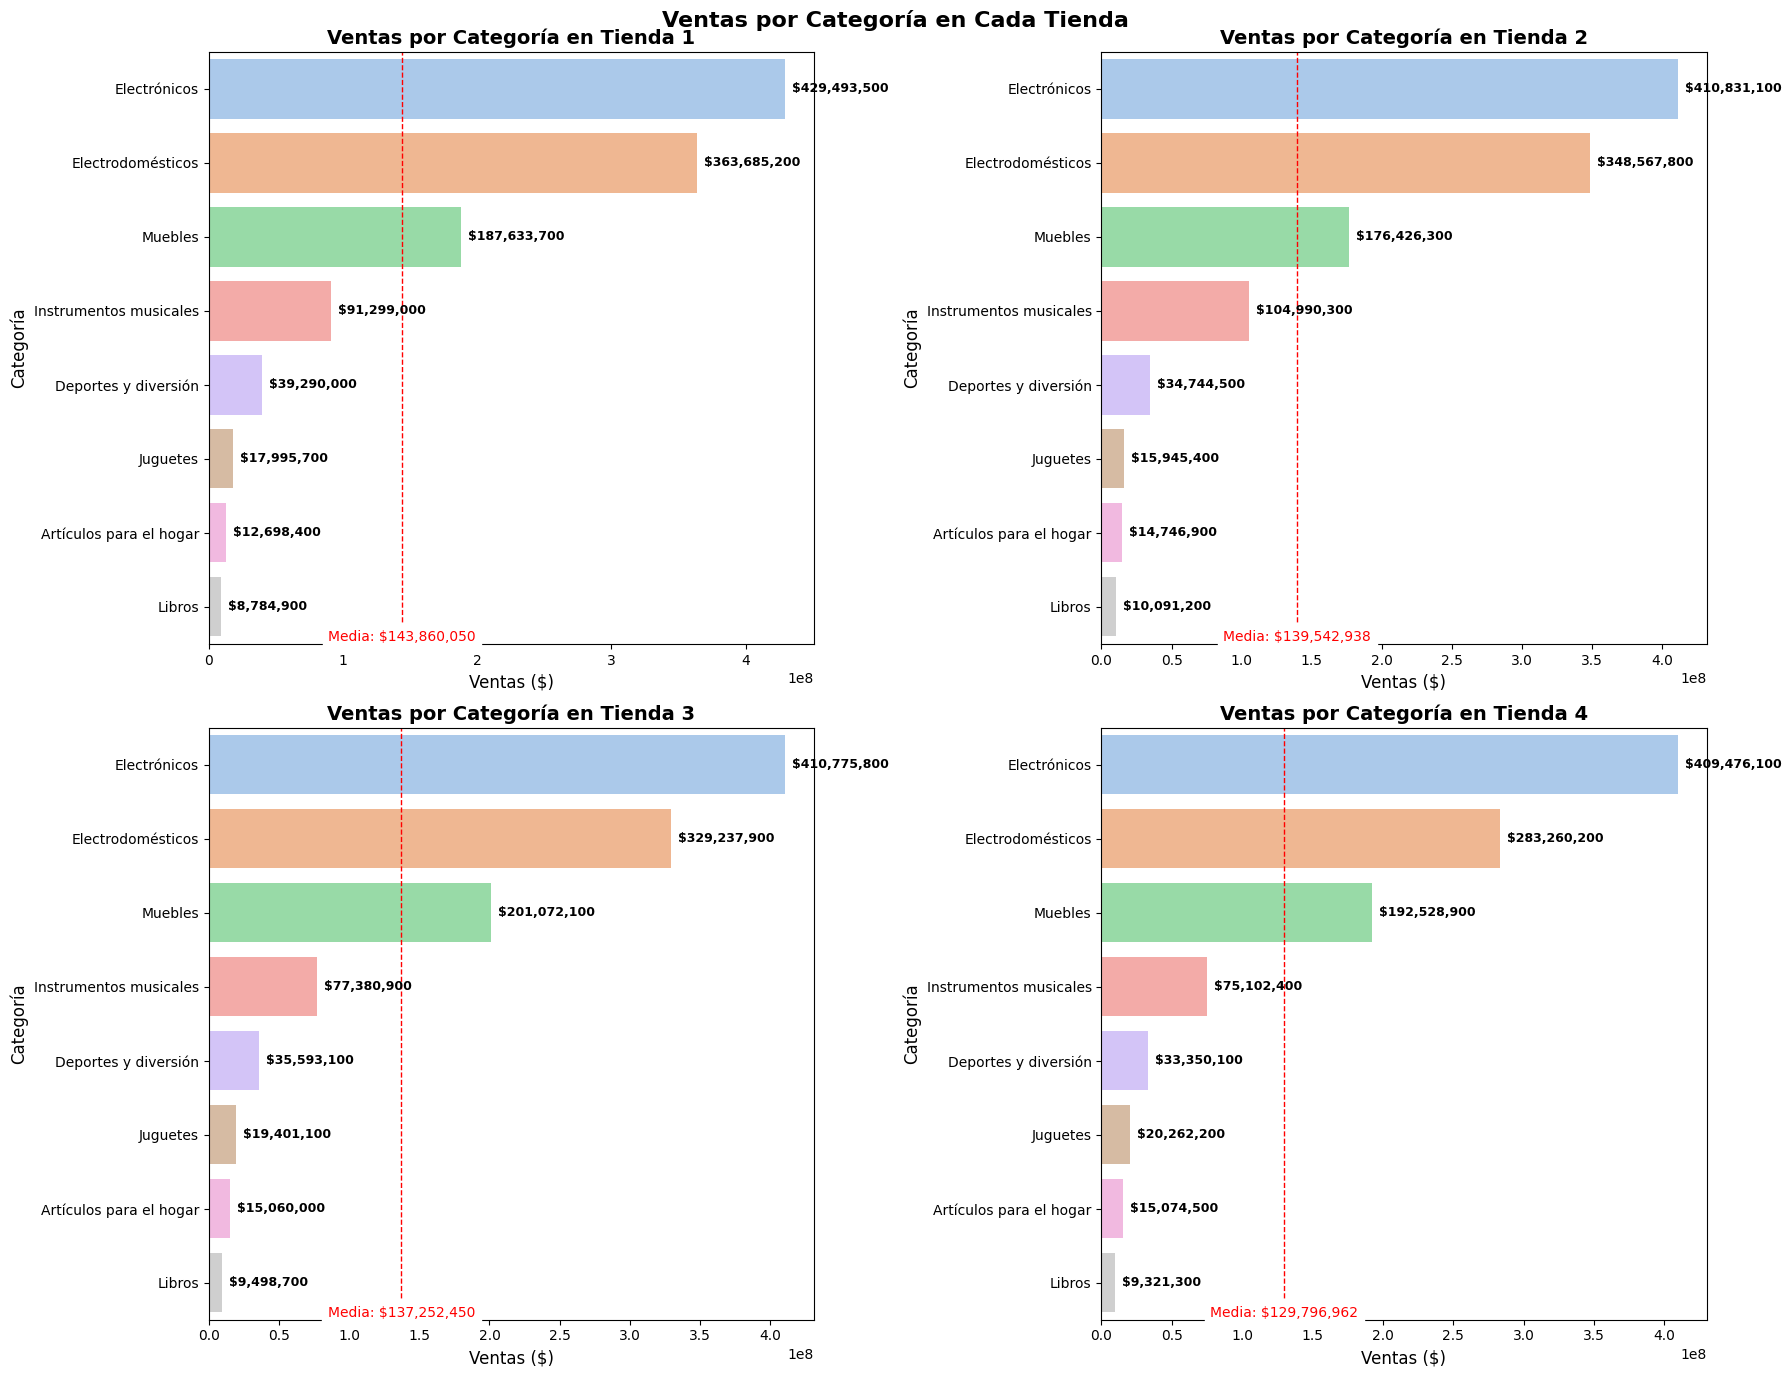

In [11]:
# Ventas por categoría para cada tienda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Agrupando las ventas por categoría para cada tienda
ventas_categoria_t1 = (
    tienda1.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t2 = (
    tienda2.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t3 = (
    tienda3.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t4 = (
    tienda4.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

# Crear un diccionario para almacenar los DataFrames con formato para mejor visualización
ventas_categorias = {
    "Tienda 1": ventas_categoria_t1,
    "Tienda 2": ventas_categoria_t2,
    "Tienda 3": ventas_categoria_t3,
    "Tienda 4": ventas_categoria_t4,
}

# Top 3 categorías para cada tienda
print("TOP 3 CATEGORÍAS POR TIENDA\n" + "=" * 25)
for tienda, ventas in ventas_categorias.items():
    print(f"\n{tienda}:")
    top3 = ventas.head(3)
    for i, (cat, valor) in enumerate(top3.items(), 1):
        print(f"{i}. {cat}: ${valor:,.2f}")
    # Calcular el porcentaje de ventas que representan las top 3 categorías
    porcentaje_top3 = (top3.sum() / ventas.sum() * 100).round(2)
    print(
        f"Estas 3 categorías representan el {porcentaje_top3}% de las ventas de la tienda"
    )

# Visualizar las ventas por categoría para cada tienda
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

for i, (tienda, ventas) in enumerate(ventas_categorias.items()):
    # Convertir a DataFrame para usar con sns.barplot
    df_ventas = pd.DataFrame({"Categoría": ventas.index, "Ventas": ventas.values})

    # Gráfico de barras horizontales para mejor visualización
    sns.barplot(
        y="Categoría",
        x="Ventas",
        data=df_ventas,
        ax=axs[i],
        hue="Categoría",
        legend=False,
    )

    # Añadir valores a las barras
    for j, p in enumerate(axs[i].patches):
        width = p.get_width()
        axs[i].annotate(
            f"${width:,.0f}",
            (width, p.get_y() + p.get_height() / 2),
            ha="left",
            va="center",
            fontsize=9,
            fontweight="bold",
            xytext=(5, 0),
            textcoords="offset points",
        )

    # Añadir título y etiquetas
    axs[i].set_title(
        f"Ventas por Categoría en {tienda}", fontsize=14, fontweight="bold"
    )
    axs[i].set_xlabel("Ventas ($)", fontsize=12)
    axs[i].set_ylabel("Categoría", fontsize=12)
    axs[i].tick_params(axis="y", labelsize=10)

    # Añadir línea de media
    media = ventas.mean()
    axs[i].axvline(x=media, color="red", linestyle="--", linewidth=1)
    axs[i].text(
        media,
        len(ventas) - 0.5,
        f"Media: ${media:,.0f}",
        color="red",
        ha="center",
        va="bottom",
        backgroundcolor="white",
        fontsize=10,
    )

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Ventas por Categoría en Cada Tienda", fontsize=16, fontweight="bold")
plt.show()

In [12]:
# Concatenando todos los dataframes para análisis global
tiendas_completo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Añadiendo un identificador de tienda para análisis
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Dataset enriquecido para análisis
tiendas_enriquecido = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular el número de productos vendidos por categoría
productos_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Producto"]
    .count()
    .sort_values(ascending=False)
)

# Mostrar la cantidad de productos vendidos por categoría
print("\nCantidad de productos vendidos por categoría:")
print(productos_por_categoria)

# Calcular el precio promedio por categoría
precio_promedio_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Mostrar el precio promedio por categoría
print("\nPrecio promedio por categoría:")
print(precio_promedio_por_categoria)


Cantidad de productos vendidos por categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: Producto, dtype: int64

Precio promedio por categoría:
Categoría del Producto
Electrodomésticos          1152960.05
Electrónicos                937119.92
Instrumentos musicales      463177.42
Muebles                     401729.06
Deportes y diversión        128461.55
Artículos para el hogar      78876.44
Juguetes                     57057.67
Libros                       50803.37
Name: Precio, dtype: float64


## Ventas Totales por Categoría en Todas las Tiendas

Vamos a analizar cuáles son las categorías de productos que generan mayor valor de ventas en el conjunto de todas las tiendas.

Ventas totales por categoría en todas las tiendas:
Electrónicos: $1,660,576,500.00
Electrodomésticos: $1,324,751,100.00
Muebles: $757,661,000.00
Instrumentos musicales: $348,772,600.00
Deportes y diversión: $142,977,700.00
Juguetes: $73,604,400.00
Artículos para el hogar: $57,579,800.00
Libros: $37,696,100.00


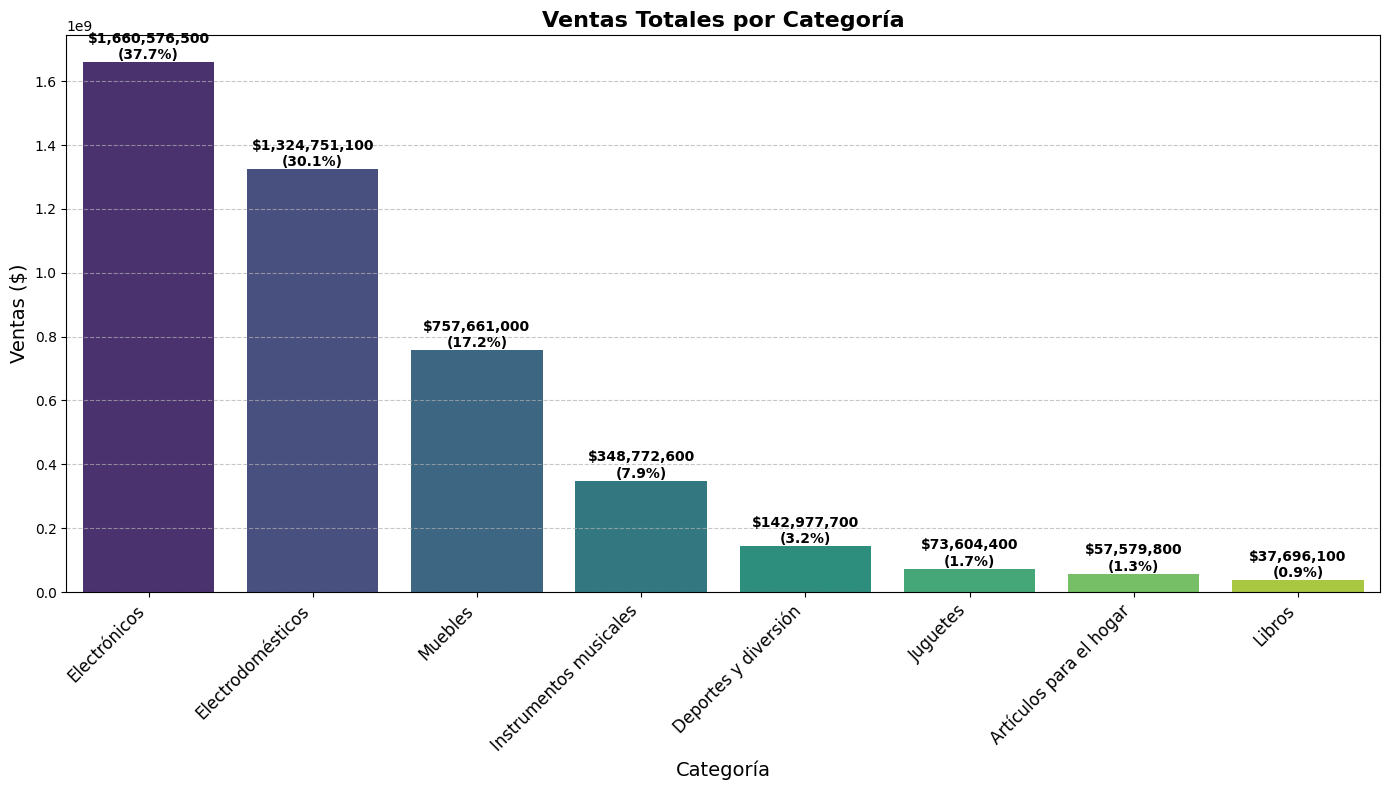

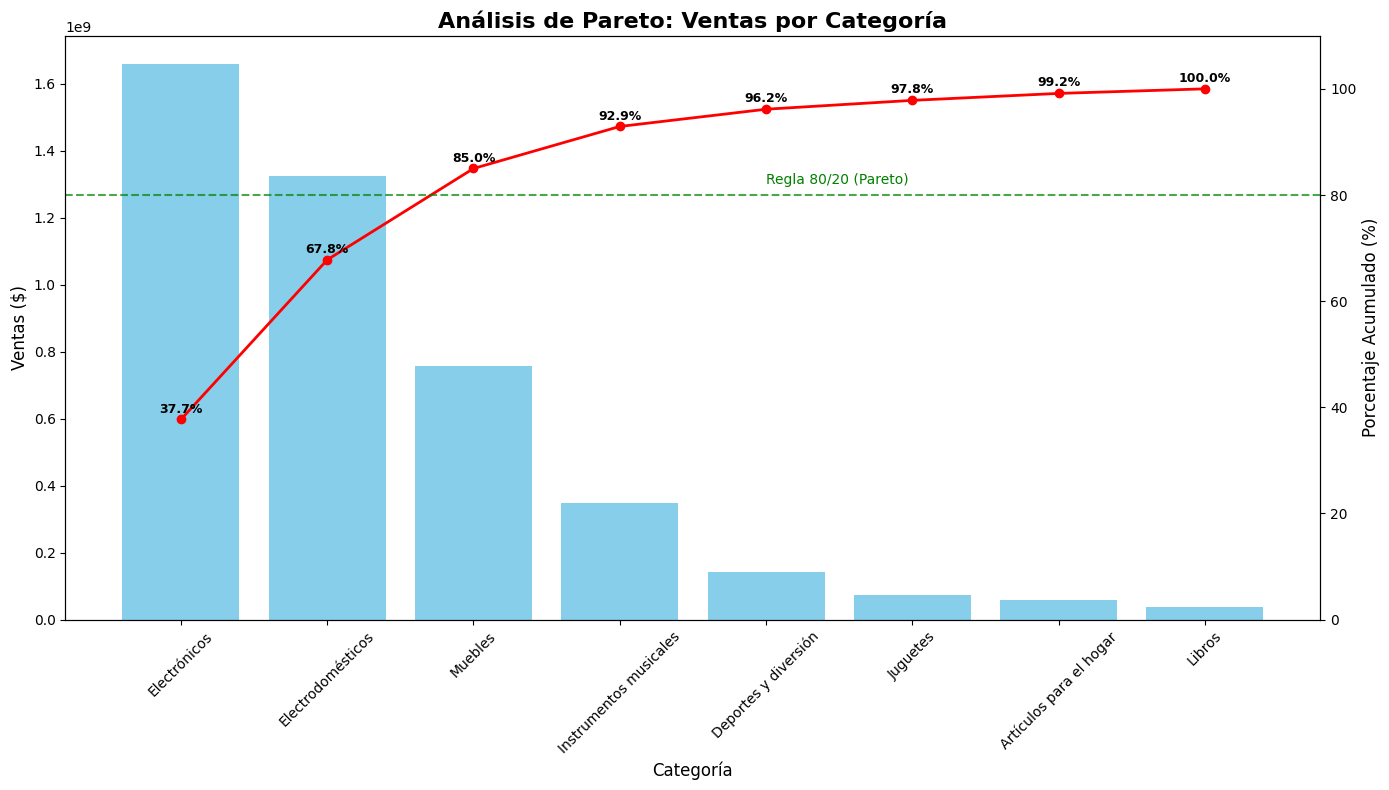


Análisis de Pareto:
El 2 de 8 categorías (25.0%) generan el 67.8% de las ventas totales.
Estas categorías son:
1. Electrónicos: $1,660,576,500.00 (37.7% del total)
2. Electrodomésticos: $1,324,751,100.00 (30.1% del total)


In [13]:
# Calcular ventas totales por categoría en todas las tiendas
ventas_categoria_total = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

print("Ventas totales por categoría en todas las tiendas:")
for cat, valor in ventas_categoria_total.items():
    print(f"{cat}: ${valor:,.2f}")

# Calcular el porcentaje acumulado para análisis de Pareto
total_ventas_global = ventas_categoria_total.sum()
ventas_porcentaje = (ventas_categoria_total / total_ventas_global * 100).round(2)
ventas_acumulado = ventas_porcentaje.cumsum()

# Crear DataFrame para mejor manipulación
df_analisis = pd.DataFrame(
    {
        "Categoría": ventas_categoria_total.index,
        "Ventas": ventas_categoria_total.values,
        "Porcentaje": ventas_porcentaje.values,
        "Acumulado": ventas_acumulado.values,
    }
)

# Gráfico de barras mejorado para ventas totales
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Categoría",
    y="Ventas",
    data=df_analisis,
    hue="Categoría",
    palette="viridis",
    legend=False,
)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    porcentaje = df_analisis["Porcentaje"][i]
    ax.annotate(
        f"${altura:,.0f}\n({porcentaje:.1f}%)",
        (p.get_x() + p.get_width() / 2.0, altura),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# Mejorar apariencia del gráfico
plt.title("Ventas Totales por Categoría", fontsize=16, fontweight="bold")
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas ($)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Pareto (barras + línea acumulada)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras para mostrar el valor de ventas
ax1.bar(df_analisis["Categoría"], df_analisis["Ventas"], color="skyblue")
ax1.set_xlabel("Categoría", fontsize=12)
ax1.set_ylabel("Ventas ($)", fontsize=12)
ax1.set_title(
    "Análisis de Pareto: Ventas por Categoría", fontsize=16, fontweight="bold"
)
ax1.tick_params(axis="x", rotation=45, labelsize=10)

# Línea para mostrar el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(
    df_analisis["Categoría"], df_analisis["Acumulado"], "ro-", linewidth=2, markersize=6
)
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.set_ylim([0, 110])

# Añadir línea de 80% (regla de Pareto)
ax2.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax2.text(
    len(df_analisis["Categoría"]) / 2,
    82,
    "Regla 80/20 (Pareto)",
    color="green",
    fontsize=10,
)

# Añadir puntos de datos para mejor lectura
for i, (cat, acum) in enumerate(
    zip(df_analisis["Categoría"], df_analisis["Acumulado"])
):
    ax2.annotate(
        f"{acum:.1f}%",
        (i, acum),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la regla de Pareto (80/20)
categorias_80 = df_analisis[df_analisis["Acumulado"] <= 80]
print(f"\nAnálisis de Pareto:")
print(
    f"El {len(categorias_80)} de {len(df_analisis)} categorías ({(len(categorias_80)/len(df_analisis)*100):.1f}%) "
    + f"generan el {categorias_80['Acumulado'].max():.1f}% de las ventas totales."
)
print("Estas categorías son:")
for i, (idx, row) in enumerate(categorias_80.iterrows(), 1):
    print(
        f"{i}. {row['Categoría']}: ${row['Ventas']:,.2f} ({row['Porcentaje']:.1f}% del total)"
    )

## Distribución Porcentual de Ventas por Categoría

En esta sección visualizamos cómo se distribuyen porcentualmente las ventas entre las diferentes categorías de productos, lo que nos permite identificar cuáles son las más importantes en términos relativos.

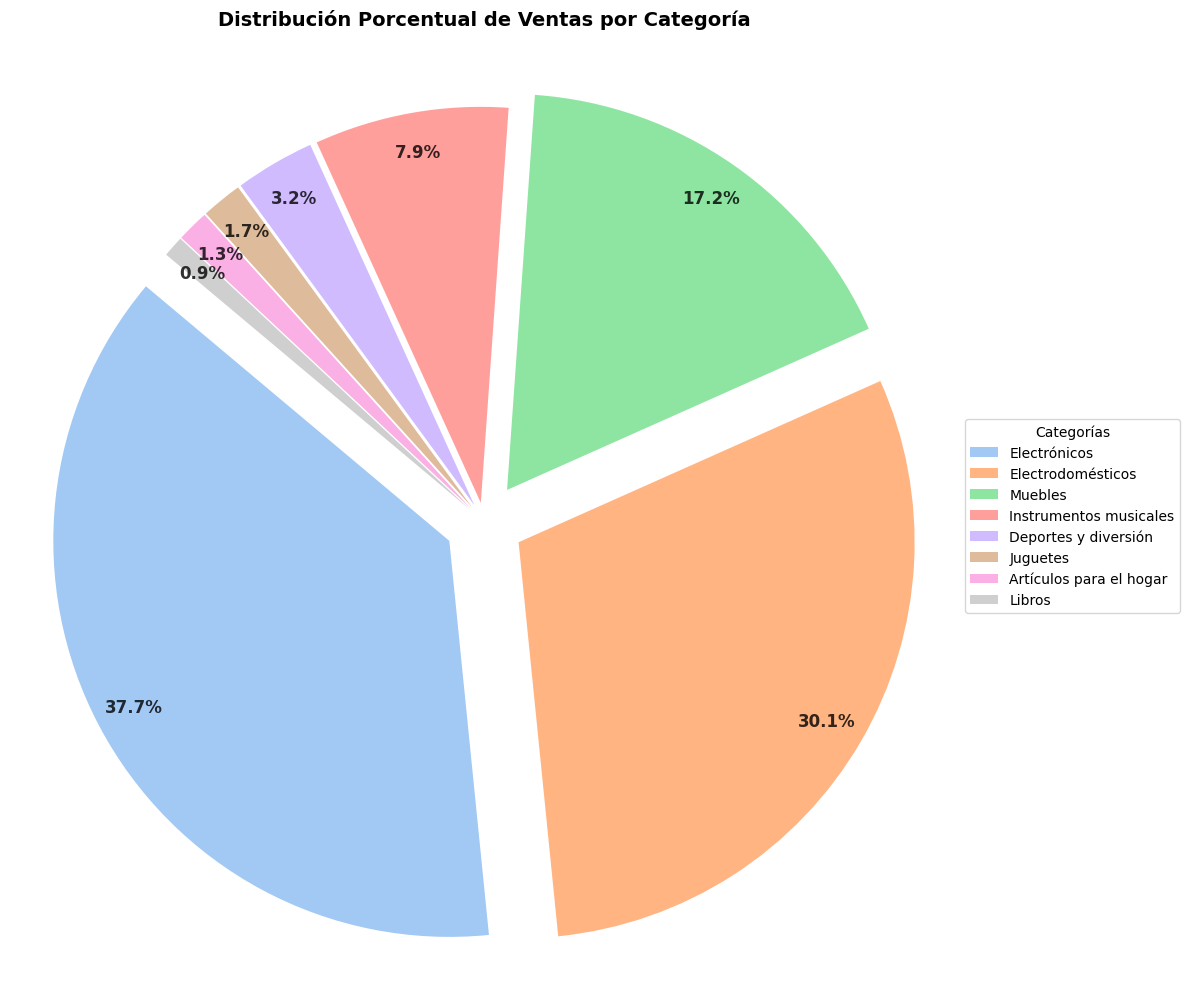


Análisis de la distribución porcentual de ventas:
La categoría de mayor venta 'Electrónicos' representa el 37.71% del total
Las tres principales categorías representan el 85.00% del total

Índice de concentración de ventas: 2701.57/10000
Interpretación: Mercado altamente concentrado - Pocas categorías concentran la mayoría de las ventas


In [14]:
# Calculando el porcentaje de ventas por categoría
total_ventas = ventas_categoria_total.sum()
ventas_porcentaje = (ventas_categoria_total / total_ventas * 100).round(2)

# Clasificar categorías por importancia para mejor visualización
ventas_principales = ventas_porcentaje[
    ventas_porcentaje >= 5
]  # Categorías con más del 5%
ventas_secundarias = ventas_porcentaje[
    ventas_porcentaje < 5
]  # Categorías con menos del 5%

# Si hay muchas categorías pequeñas, agruparlas en 'Otras'
si_agrupar = len(ventas_secundarias) > 4
if si_agrupar:
    otras = pd.Series([ventas_secundarias.sum()], index=["Otras categorías"])
    ventas_para_grafico = pd.concat([ventas_principales, otras])
else:
    ventas_para_grafico = ventas_porcentaje

# Crear gráfico de pastel para mostrar la distribución de ventas por categoría
plt.figure(figsize=(12, 10))
# Ajustar el tamaño de la figura y agregar espacio en la parte superior para el título
plt.subplots_adjust(top=0.85)

# Configurar colores y explosión (destacar categorías principales)
colors = sns.color_palette("pastel", len(ventas_para_grafico))
explode = [
    0.1 if p >= 10 else 0.05 for p in ventas_para_grafico
]  # Destacar categorías con más del 10%

# Leyendas para el Grafico de pastel
patches, texts, autotexts = plt.pie(
    ventas_para_grafico,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.9,
    labels=None,
    colors=colors,
    explode=explode,
)

# Mejorar la apariencia del texto de porcentajes
plt.setp(autotexts, size=12, weight="bold", color="black", alpha=0.8, ha="center")

# Añadir título con más espacio desde el gráfico
plt.title(
    "Distribución Porcentual de Ventas por Categoría",
    pad=20,
    fontsize=14,
    fontweight="bold",
)

# Añadir una leyenda fuera del gráfico
plt.legend(
    patches,
    ventas_para_grafico.index,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
)

plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Análisis adicional de la distribución
print("\nAnálisis de la distribución porcentual de ventas:")
print(
    f"La categoría de mayor venta '{ventas_porcentaje.idxmax()}' representa el {ventas_porcentaje.max():.2f}% del total"
)
print(
    f"Las tres principales categorías representan el {ventas_porcentaje.nlargest(3).sum():.2f}% del total"
)

# Calcular el índice de concentración (similar a Herfindahl-Hirschman Index)
hhi = (ventas_porcentaje / 100 * ventas_porcentaje / 100).sum() * 10000
print(f"\nÍndice de concentración de ventas: {hhi:.2f}/10000")
if hhi < 1500:
    print(
        "Interpretación: Mercado no concentrado - Las ventas están bien distribuidas entre varias categorías"
    )
elif hhi < 2500:
    print(
        "Interpretación: Mercado moderadamente concentrado - Algunas categorías dominan las ventas"
    )
else:
    print(
        "Interpretación: Mercado altamente concentrado - Pocas categorías concentran la mayoría de las ventas"
    )

## Comparación de Ventas por Categoría entre Tiendas

Este análisis nos permite identificar las fortalezas y debilidades de cada tienda en relación a las diferentes categorías de productos, detectando oportunidades de especialización o mejora.

<Figure size 1400x800 with 0 Axes>

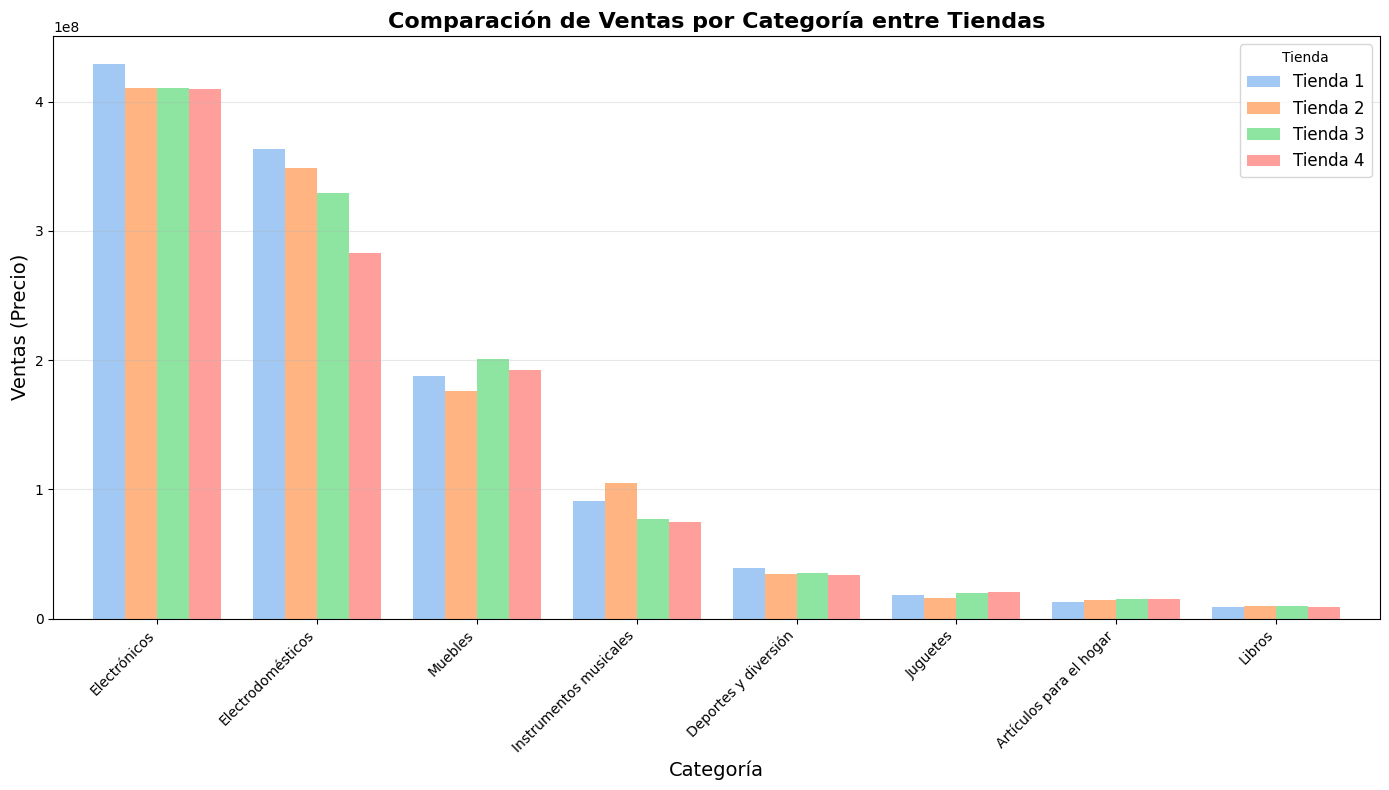

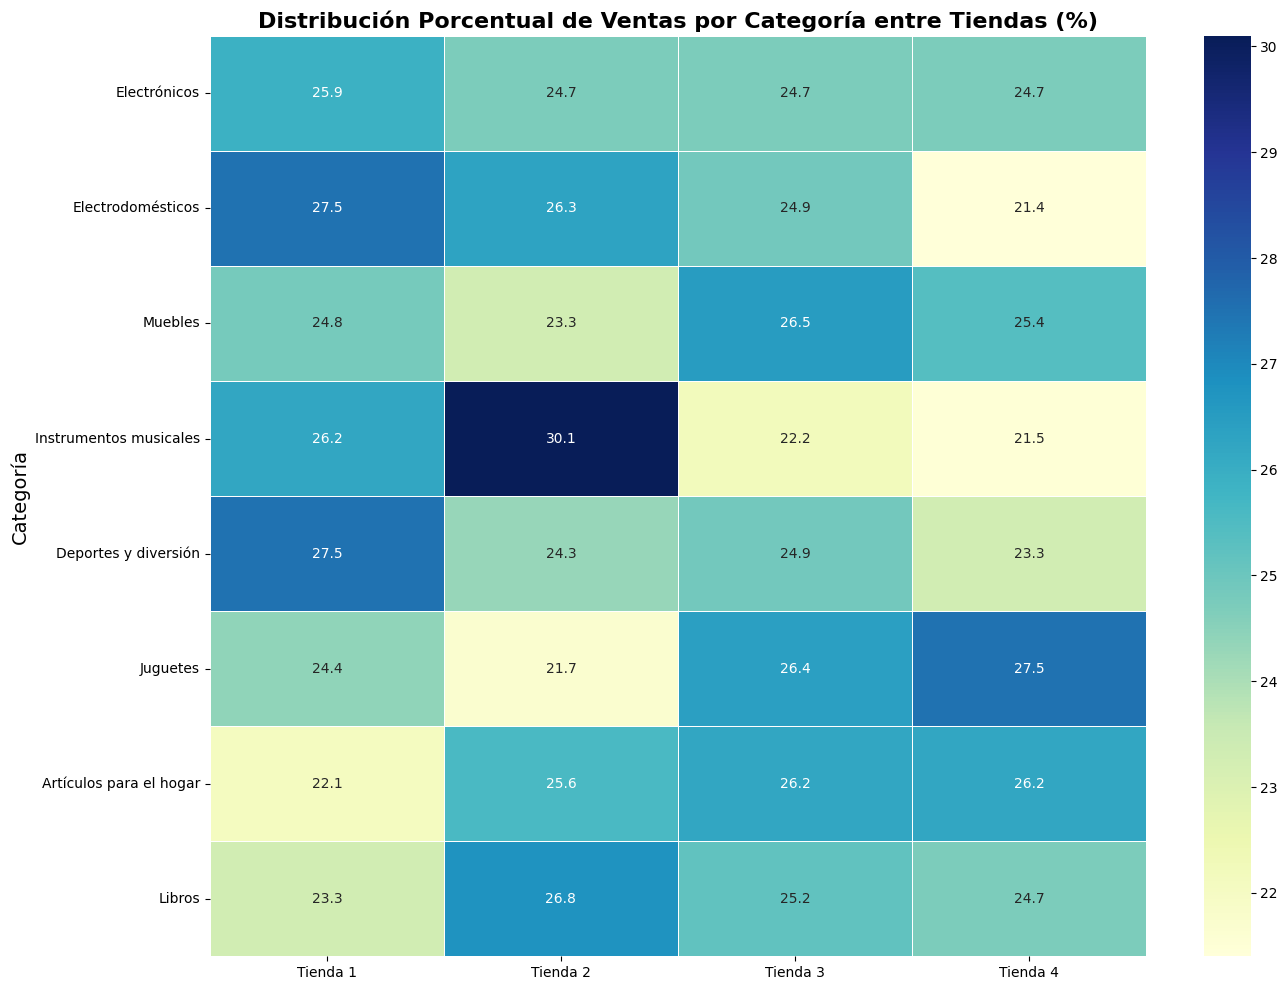


Análisis de especialización por tienda:

Tienda 1 lidera en 3 categorías:
- Electrodomésticos: 27.5% de las ventas totales de esta categoría
- Deportes y diversión: 27.5% de las ventas totales de esta categoría
- Electrónicos: 25.9% de las ventas totales de esta categoría

Tienda 2 lidera en 2 categorías:
- Instrumentos musicales: 30.1% de las ventas totales de esta categoría
- Libros: 26.8% de las ventas totales de esta categoría

Tienda 3 lidera en 2 categorías:
- Muebles: 26.5% de las ventas totales de esta categoría
- Artículos para el hogar: 26.2% de las ventas totales de esta categoría

Tienda 4 lidera en 2 categorías:
- Juguetes: 27.5% de las ventas totales de esta categoría
- Artículos para el hogar: 26.2% de las ventas totales de esta categoría


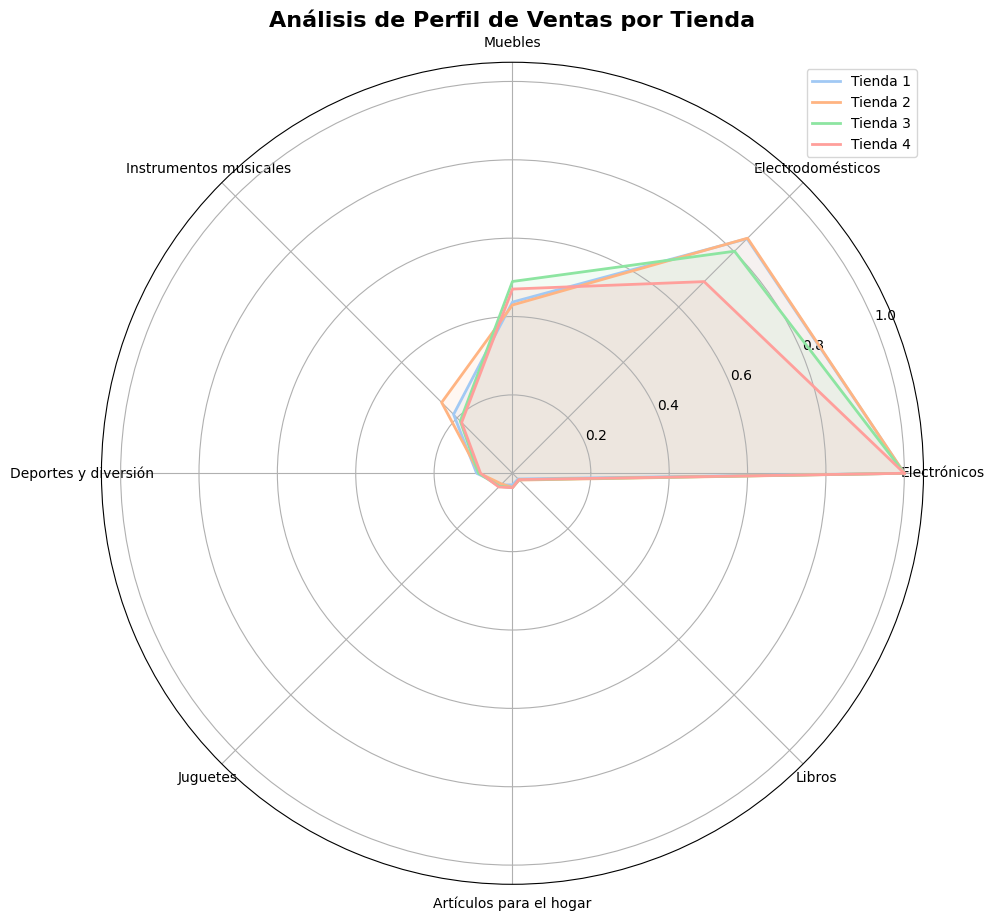

In [15]:
# Análisis comparativo de ventas por categoría entre tiendas
categorias = ventas_categoria_total.index

# Creando un dataframe para la comparación
comparacion = pd.DataFrame(
    {
        "Tienda 1": pd.Series(ventas_categoria_t1, index=categorias).fillna(0),
        "Tienda 2": pd.Series(ventas_categoria_t2, index=categorias).fillna(0),
        "Tienda 3": pd.Series(ventas_categoria_t3, index=categorias).fillna(0),
        "Tienda 4": pd.Series(ventas_categoria_t4, index=categorias).fillna(0),
    }
)

# Añadir columnas de totales y porcentajes para análisis
comparacion["Total"] = comparacion.sum(axis=1)
for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    comparacion[f"% {tienda}"] = (
        comparacion[tienda] / comparacion["Total"] * 100
    ).round(1)

# Visualización 1: Gráfico de barras apiladas para comparación
plt.figure(figsize=(14, 8))
comparacion_plot = comparacion[["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]]
ax = comparacion_plot.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.title(
    "Comparación de Ventas por Categoría entre Tiendas", fontsize=16, fontweight="bold"
)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas (Precio)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tienda", fontsize=12)
plt.grid(axis="y", alpha=0.3)

# Añadir etiquetas para las categorías principales
top_categorias = comparacion.nlargest(3, "Total").index
for i, categoria in enumerate(categorias):
    if categoria in top_categorias:
        plt.annotate(
            f"{categoria}",
            xy=(i, comparacion.loc[categoria, "Total"]),
            xytext=(0, 10),
            textcoords="offset points",
            ha="center",
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3),
        )

plt.tight_layout()
plt.show()

# Visualización 2: Heatmap para identificar fortalezas/debilidades por tienda
plt.figure(figsize=(14, 10))
# Usar las columnas de porcentaje para el heatmap
heatmap_data = comparacion[
    [f"% {tienda}" for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]]
]
heatmap_data.columns = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Ordenar las filas para mejor visualización
heatmap_data = heatmap_data.loc[comparacion.sort_values("Total", ascending=False).index]

# Crear heatmap
ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title(
    "Distribución Porcentual de Ventas por Categoría entre Tiendas (%)",
    fontsize=16,
    fontweight="bold",
)
plt.ylabel("Categoría", fontsize=14)
plt.tight_layout()
plt.show()

# Análisis de especialización por tienda
print("\nAnálisis de especialización por tienda:")
for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    # Identificar las categorías donde esta tienda tiene el mayor porcentaje
    categorias_dominantes = []
    for categoria in categorias:
        porcentajes_tienda = [
            comparacion.loc[categoria, f"% {t}"]
            for t in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
        ]
        if comparacion.loc[categoria, f"% {tienda}"] == max(porcentajes_tienda):
            categorias_dominantes.append(
                (categoria, comparacion.loc[categoria, f"% {tienda}"])
            )

    # Ordenar de mayor a menor porcentaje
    categorias_dominantes = sorted(
        categorias_dominantes, key=lambda x: x[1], reverse=True
    )

    print(f"\n{tienda} lidera en {len(categorias_dominantes)} categorías:")
    for cat, pct in categorias_dominantes:
        print(f"- {cat}: {pct}% de las ventas totales de esta categoría")

# Visualización 3: Análisis Radial (Spider Chart) para mostrar el perfil de cada tienda
# Seleccionar top 8 categorías para no saturar el gráfico
top_categorias = comparacion.nlargest(8, "Total").index
comparacion_radar = comparacion.loc[
    top_categorias, ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
]

# Normalizar datos para mejor comparación
comparacion_radar = comparacion_radar.div(comparacion_radar.max(axis=0), axis=1)

# Configurar gráfico
categorias = comparacion_radar.index
n_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, n_categorias, endpoint=False).tolist()
angulos += angulos[:1]  # Cerrar el círculo

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Dibujar cada tienda
for tienda in comparacion_radar.columns:
    valores = comparacion_radar[tienda].tolist()
    valores += valores[:1]  # Cerrar el polígono
    ax.plot(angulos, valores, linewidth=2, label=tienda)
    ax.fill(angulos, valores, alpha=0.1)

# Añadir etiquetas
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias, size=10)
plt.title("Análisis de Perfil de Ventas por Tienda", fontsize=16, fontweight="bold")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Conclusiones del análisis de ventas por categoría

In [16]:
# Crear un dataframe resumen para facilitar el análisis
resumen_categorias = pd.DataFrame(
    {
        "Categoría": ventas_categoria_total.index,
        "Venta Total": ventas_categoria_total.values,
        "% del Total": ventas_porcentaje.values,
        "Cant. Productos": productos_por_categoria[ventas_categoria_total.index].values,
        "Precio Promedio": precio_promedio_por_categoria[
            ventas_categoria_total.index
        ].values,
    }
)

# Ordenar por venta total descendente
resumen_categorias = resumen_categorias.sort_values(
    "Venta Total", ascending=False
).reset_index(drop=True)

# Dar formato a las columnas numéricas
resumen_categorias_formato = resumen_categorias.copy()
resumen_categorias_formato["Venta Total"] = resumen_categorias_formato[
    "Venta Total"
].apply(lambda x: f"${x:,.2f}")
resumen_categorias_formato["% del Total"] = resumen_categorias_formato[
    "% del Total"
].apply(lambda x: f"{x:.2f}%")
resumen_categorias_formato["Precio Promedio"] = resumen_categorias_formato[
    "Precio Promedio"
].apply(lambda x: f"${x:,.2f}")

# Mostrar tabla resumen
print("\nTabla Resumen de Ventas por Categoría:\n" + "=" * 60)
print(resumen_categorias_formato)

# Destacar hallazgos principales
print("\n\nCONCLUSIONES PRINCIPALES DEL ANÁLISIS DE VENTAS POR CATEGORÍA\n" + "=" * 60)

# Identificar categorías de alto valor
top_categoria = resumen_categorias.iloc[0]["Categoría"]
top_valor = resumen_categorias.iloc[0]["Venta Total"]
top_porcentaje = resumen_categorias.iloc[0]["% del Total"]

# Identificar categorías con mayor cantidad de productos vendidos
top_cantidad = resumen_categorias.sort_values("Cant. Productos", ascending=False).iloc[
    0
]

# Identificar categorías con mayor precio promedio
top_precio = resumen_categorias.sort_values("Precio Promedio", ascending=False).iloc[0]

# Conclusiones
print(
    f"1. La categoría '{top_categoria}' lidera las ventas con ${top_valor:,.2f}, representando el {top_porcentaje:.2f}% del total."
)
print(
    f"2. Las tres principales categorías ({', '.join(resumen_categorias['Categoría'][:3])}) representan el {resumen_categorias['% del Total'][:3].sum():.2f}% del total de ventas."
)
print(
    f"3. La categoría '{top_cantidad['Categoría']}' tiene la mayor cantidad de productos vendidos ({top_cantidad['Cant. Productos']}), lo que indica alta rotación de inventario."
)
print(
    f"4. La categoría '{top_precio['Categoría']}' tiene el mayor precio promedio (${top_precio['Precio Promedio']:,.2f}), lo que sugiere productos premium."
)

# Identificar tiendas especializadas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
for tienda in tiendas:
    # Identificar categorias donde esta tienda tiene el mayor % del total
    categorias_principales = comparacion[
        comparacion[f"% {tienda}"]
        == comparacion[[f"% {t}" for t in tiendas]].max(axis=1)
    ]
    if not categorias_principales.empty:
        cat_principal = categorias_principales["Total"].idxmax()
        print(
            f"5. {tienda} tiene una especialización destacada en '{cat_principal}' con el {comparacion.loc[cat_principal, f'% {tienda}']:.1f}% del total de ventas de esta categoría."
        )
        break


Tabla Resumen de Ventas por Categoría:
                 Categoría        Venta Total % del Total  Cant. Productos  \
0             Electrónicos  $1,660,576,500.00      37.71%             1772   
1        Electrodomésticos  $1,324,751,100.00      30.08%             1149   
2                  Muebles    $757,661,000.00      17.21%             1886   
3   Instrumentos musicales    $348,772,600.00       7.92%              753   
4     Deportes y diversión    $142,977,700.00       3.25%             1113   
5                 Juguetes     $73,604,400.00       1.67%             1290   
6  Artículos para el hogar     $57,579,800.00       1.31%              730   
7                   Libros     $37,696,100.00       0.86%              742   

  Precio Promedio  
0     $937,119.92  
1   $1,152,960.05  
2     $401,729.06  
3     $463,177.42  
4     $128,461.55  
5      $57,057.67  
6      $78,876.44  
7      $50,803.37  


CONCLUSIONES PRINCIPALES DEL ANÁLISIS DE VENTAS POR CATEGORÍA
1. La categor

# 3. Calificación promedio de la tienda

En esta sección analizaremos las calificaciones recibidas por cada tienda para comprender la satisfacción de los clientes. Este análisis permitirá:

- Identificar la tienda mejor valorada por los clientes
- Comparar la distribución de calificaciones entre tiendas
- Analizar la relación entre calificaciones y otras variables como categorías de productos o costos de envío
- Evaluar la consistencia del servicio al cliente mediante análisis de variabilidad

Una alta calificación promedio puede indicar una experiencia de compra más satisfactoria, lo que contribuye a la fidelización del cliente y a mejores resultados en ventas a largo plazo.

Estadísticas de calificaciones por tienda:
     Tienda  Calificación Promedio  Calificación Mediana  Desviación Estándar  \
0  Tienda 1                   3.98                   5.0                 1.42   
1  Tienda 2                   4.04                   5.0                 1.36   
2  Tienda 3                   4.05                   5.0                 1.39   
3  Tienda 4                   4.00                   5.0                 1.40   

   CV (%)  
0   35.68  
1   33.66  
2   34.32  
3   35.00  


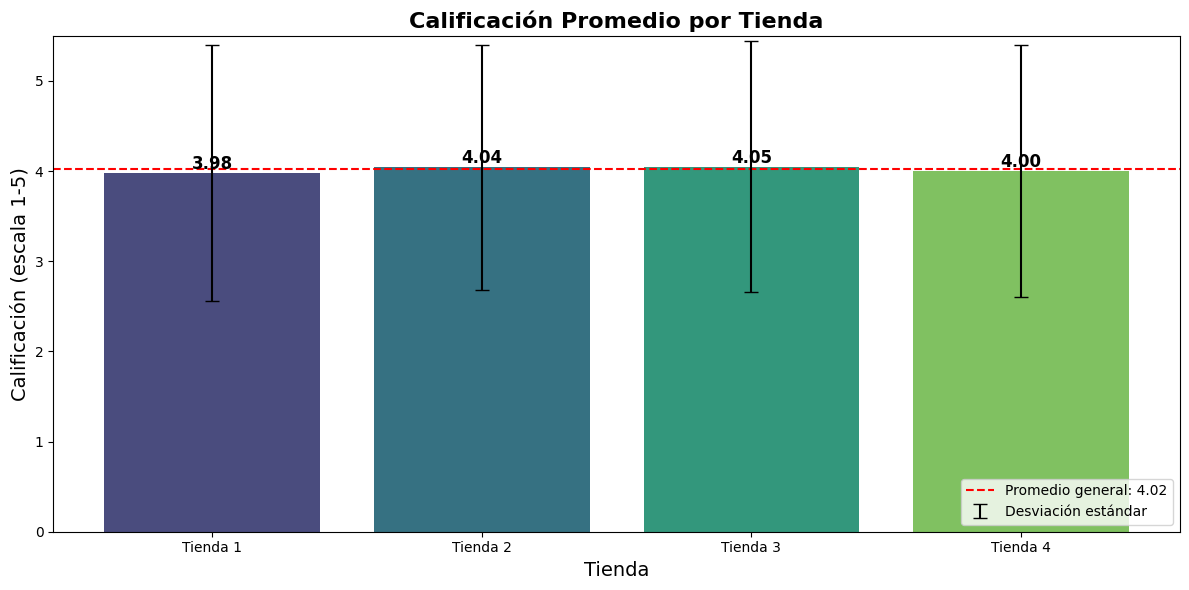


La tienda mejor calificada es Tienda 3 con 4.05 puntos.
La tienda peor calificada es Tienda 1 con 3.98 puntos.
La diferencia entre la mejor y peor calificación es de 0.07 puntos.


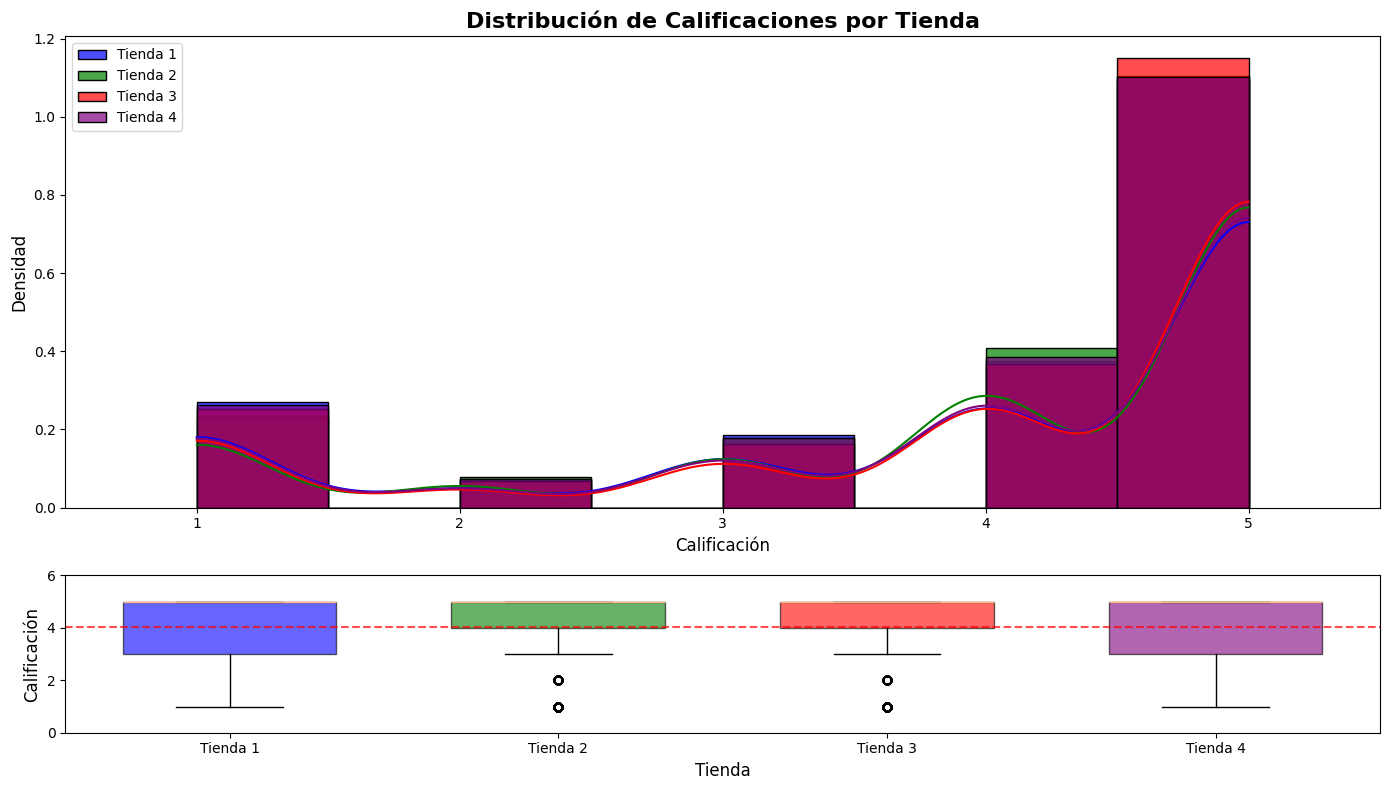


Interpretación de distribución de calificaciones:
Calificación más frecuente (moda):
- Tienda 1: 5
- Tienda 2: 5
- Tienda 3: 5
- Tienda 4: 5

La Tienda 2 muestra la mayor consistencia en sus calificaciones con un coeficiente de variación de 33.66%, lo que sugiere un servicio al cliente más estable.


In [17]:
# Análisis de calificaciones por tienda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Configuración de estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Calcular la calificación promedio de cada tienda
calif_promedio_t1 = tienda1["Calificación"].mean().round(2)
calif_promedio_t2 = tienda2["Calificación"].mean().round(2)
calif_promedio_t3 = tienda3["Calificación"].mean().round(2)
calif_promedio_t4 = tienda4["Calificación"].mean().round(2)

# Calcular medidas estadísticas adicionales
calif_median_t1 = tienda1["Calificación"].median()
calif_median_t2 = tienda2["Calificación"].median()
calif_median_t3 = tienda3["Calificación"].median()
calif_median_t4 = tienda4["Calificación"].median()

calif_std_t1 = tienda1["Calificación"].std().round(2)
calif_std_t2 = tienda2["Calificación"].std().round(2)
calif_std_t3 = tienda3["Calificación"].std().round(2)
calif_std_t4 = tienda4["Calificación"].std().round(2)

# Crear un dataframe para los resultados
calif_datos = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Calificación Promedio": [
            calif_promedio_t1,
            calif_promedio_t2,
            calif_promedio_t3,
            calif_promedio_t4,
        ],
        "Calificación Mediana": [
            calif_median_t1,
            calif_median_t2,
            calif_median_t3,
            calif_median_t4,
        ],
        "Desviación Estándar": [calif_std_t1, calif_std_t2, calif_std_t3, calif_std_t4],
        "CV (%)": [
            (calif_std_t1 / calif_promedio_t1 * 100).round(2),
            (calif_std_t2 / calif_promedio_t2 * 100).round(2),
            (calif_std_t3 / calif_promedio_t3 * 100).round(2),
            (calif_std_t4 / calif_promedio_t4 * 100).round(2),
        ],
    }
)

# Mostrar tabla de resultados
print("Estadísticas de calificaciones por tienda:")
print(calif_datos)

# Gráfico de barras para la calificación promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Calificación Promedio",
    data=calif_datos,
    palette="viridis",
    hue="Tienda",
    legend=False,
)

# Añadir línea horizontal para el promedio general
promedio_general = calif_datos["Calificación Promedio"].mean()
plt.axhline(
    y=promedio_general,
    color="red",
    linestyle="--",
    label=f"Promedio general: {promedio_general:.2f}",
)

# Añadir etiquetas y personalizar gráfico
plt.title("Calificación Promedio por Tienda", fontsize=16, fontweight="bold")
plt.ylabel("Calificación (escala 1-5)", fontsize=14)
plt.xlabel("Tienda", fontsize=14)
plt.ylim(0, 5.5)  # Escala completa de calificaciones

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{calif_datos['Calificación Promedio'][i]:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir desviación estándar como barras de error
plt.errorbar(
    x=range(len(calif_datos)),
    y=calif_datos["Calificación Promedio"],
    yerr=calif_datos["Desviación Estándar"],
    fmt="none",
    color="black",
    capsize=5,
    label="Desviación estándar",
)

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Identificar tienda mejor y peor calificada
mejor_tienda = calif_datos.loc[calif_datos["Calificación Promedio"].idxmax()]["Tienda"]
peor_tienda = calif_datos.loc[calif_datos["Calificación Promedio"].idxmin()]["Tienda"]
diferencia = (
    calif_datos["Calificación Promedio"].max()
    - calif_datos["Calificación Promedio"].min()
).round(2)

print(
    f"\nLa tienda mejor calificada es {mejor_tienda} con {calif_datos['Calificación Promedio'].max():.2f} puntos."
)
print(
    f"La tienda peor calificada es {peor_tienda} con {calif_datos['Calificación Promedio'].min():.2f} puntos."
)
print(f"La diferencia entre la mejor y peor calificación es de {diferencia} puntos.")

# Gráfico de distribución de calificaciones
plt.figure(figsize=(14, 8))

# Crear subplots para histogramas y boxplots
gs = plt.GridSpec(2, 2, height_ratios=[3, 1])

# Histogramas de calificaciones
ax1 = plt.subplot(gs[0, :])
histplot_kwargs = {
    "binwidth": 0.5,
    "alpha": 0.7,
    "kde": True,
    "stat": "density",
    "common_norm": False,
    "linewidth": 1,
}

sns.histplot(
    data=tienda1,
    x="Calificación",
    label="Tienda 1",
    color="blue",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda2,
    x="Calificación",
    label="Tienda 2",
    color="green",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda3,
    x="Calificación",
    label="Tienda 3",
    color="red",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda4,
    x="Calificación",
    label="Tienda 4",
    color="purple",
    ax=ax1,
    **histplot_kwargs,
)

# Ajustar límites y etiquetas
ax1.set_xlim(0.5, 5.5)
ax1.set_xlabel("Calificación", fontsize=12)
ax1.set_ylabel("Densidad", fontsize=12)
ax1.set_title(
    "Distribución de Calificaciones por Tienda", fontsize=16, fontweight="bold"
)
ax1.legend(loc="upper left")

# Boxplots de calificaciones
ax2 = plt.subplot(gs[1, :])

# Combinar datos para el boxplot
tiendas_calificaciones = [
    tienda1["Calificación"],
    tienda2["Calificación"],
    tienda3["Calificación"],
    tienda4["Calificación"],
]

# Crear boxplot
box = ax2.boxplot(
    tiendas_calificaciones,
    patch_artist=True,
    tick_labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    widths=0.65,
)

# Personalizar colores de boxplots
colors = ["blue", "green", "red", "purple"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax2.set_xlabel("Tienda", fontsize=12)
ax2.set_ylabel("Calificación", fontsize=12)
ax2.set_ylim(0, 6)

# Añadir línea de promedio general
ax2.axhline(y=promedio_general, color="red", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Interpretación de resultados
print("\nInterpretación de distribución de calificaciones:")

# Calcular la moda de las calificaciones
moda_t1 = tienda1["Calificación"].mode()[0]
moda_t2 = tienda2["Calificación"].mode()[0]
moda_t3 = tienda3["Calificación"].mode()[0]
moda_t4 = tienda4["Calificación"].mode()[0]

print(f"Calificación más frecuente (moda):")
print(f"- Tienda 1: {moda_t1}")
print(f"- Tienda 2: {moda_t2}")
print(f"- Tienda 3: {moda_t3}")
print(f"- Tienda 4: {moda_t4}")

# Análisis de variabilidad
tienda_mas_consistente = calif_datos.loc[calif_datos["CV (%)"].idxmin()]["Tienda"]
print(
    f"\nLa {tienda_mas_consistente} muestra la mayor consistencia en sus calificaciones con un coeficiente de variación de {calif_datos['CV (%)'].min():.2f}%, lo que sugiere un servicio al cliente más estable."
)

## Análisis avanzado de calificaciones y su relación con otras variables

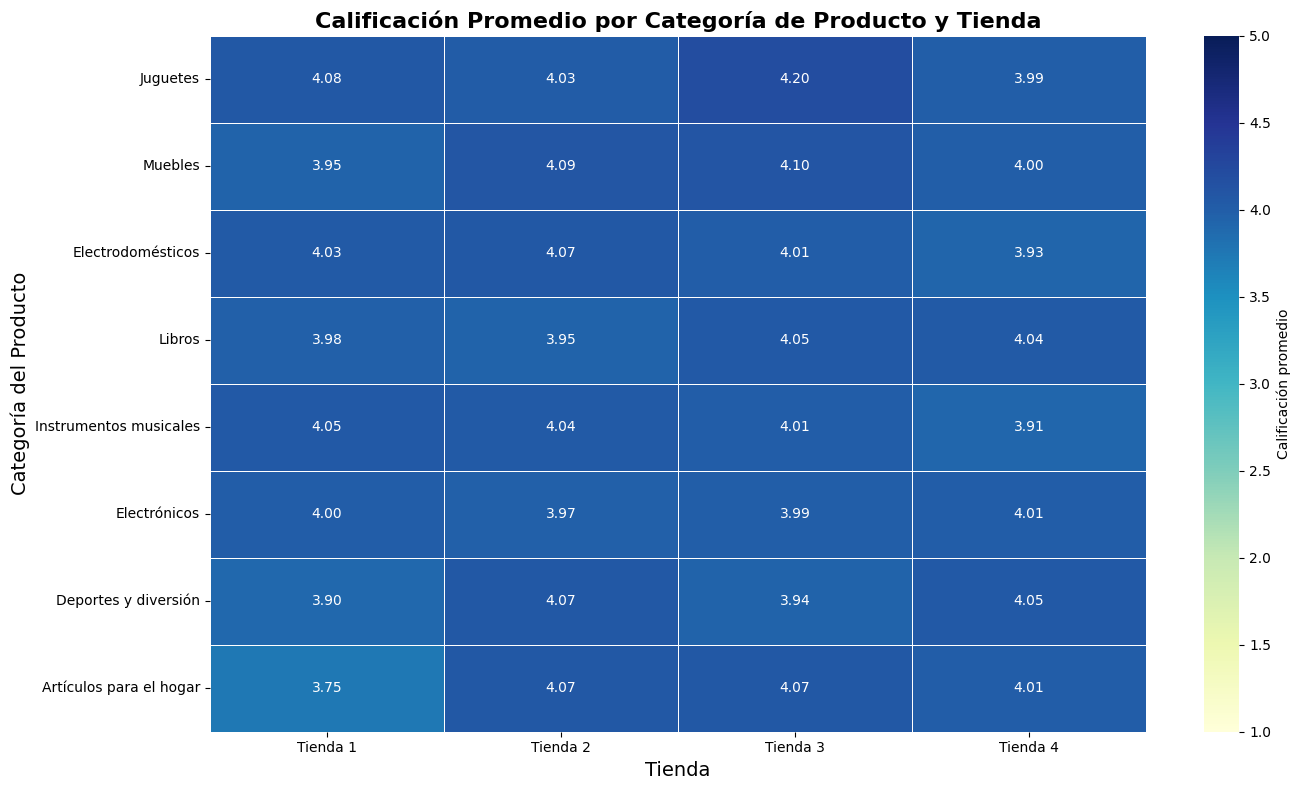

Combinaciones destacadas de Tienda y Categoría:
- Mayor calificación: Tienda 3 - Juguetes con 4.20 puntos
- Menor calificación: Tienda 1 - Artículos para el hogar con 3.75 puntos


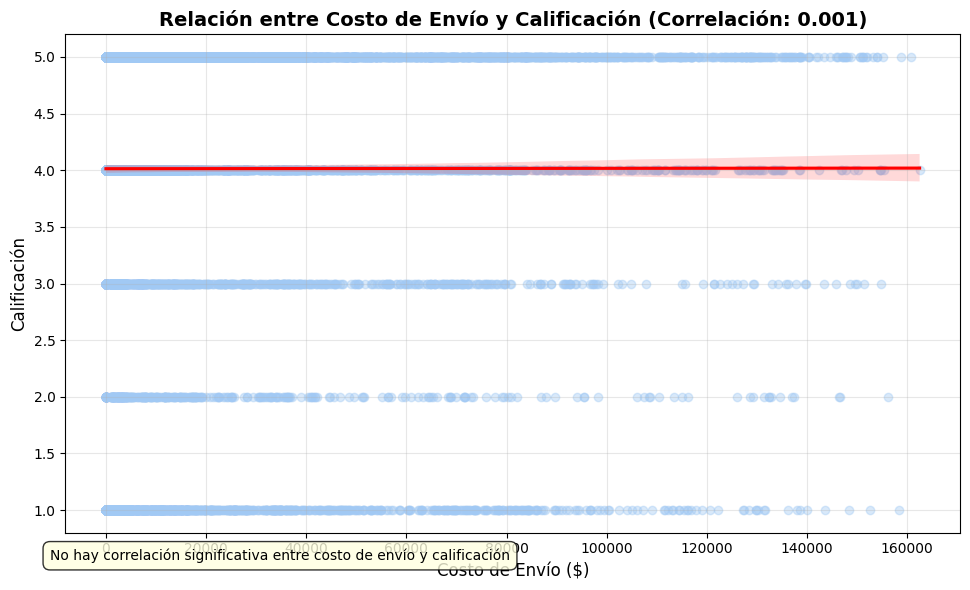

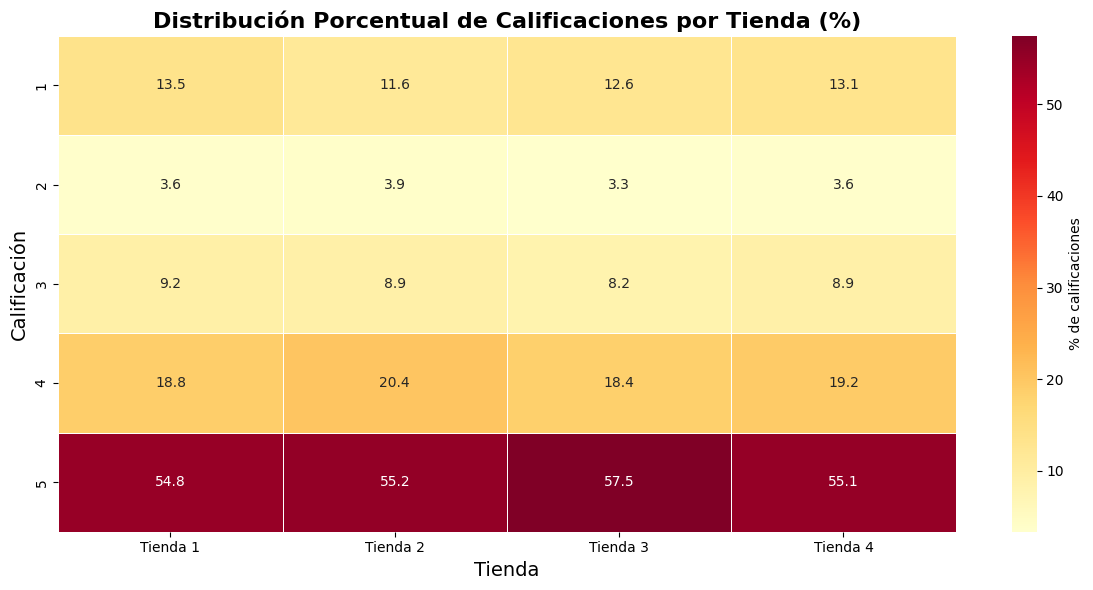


Porcentaje de calificaciones altas (4-5) por tienda:
Tienda 1: 73.6%
Tienda 2: 75.6%
Tienda 3: 75.9%
Tienda 4: 74.3%

Porcentaje de calificaciones bajas (1-2) por tienda:
Tienda 1: 17.2%
Tienda 2: 15.5%
Tienda 3: 15.9%
Tienda 4: 16.8%


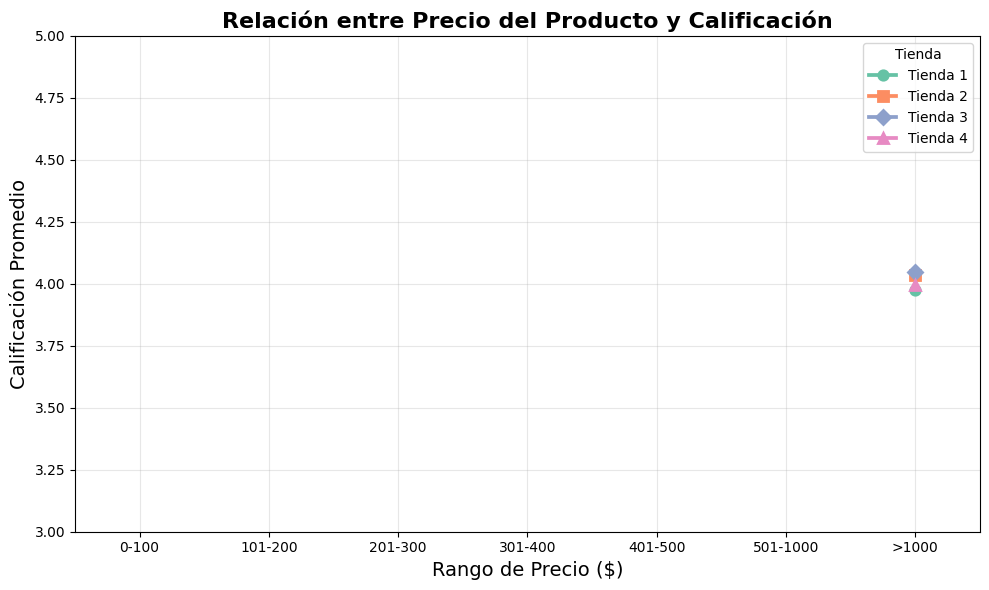


Análisis estadístico de diferencias en calificaciones entre tiendas:
Estadístico F: 1.4013
Valor p: 0.2403
No hay evidencia estadística suficiente para afirmar que existen diferencias significativas entre las calificaciones de las tiendas.


In [18]:
# Crear un dataframe combinado con identificador de tienda para análisis
tiendas_df = pd.concat(
    [tienda1, tienda2, tienda3, tienda4],
    keys=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
)
tiendas_df = tiendas_df.reset_index()
tiendas_df = tiendas_df.rename(columns={"level_0": "Tienda", "level_1": "ID_registro"})
tiendas_df = tiendas_df.drop("ID_registro", axis=1)

# Eliminar columna duplicada "Tienda" si existe
tiendas_df = tiendas_df.loc[:, ~tiendas_df.columns.duplicated()]

# 1. Relación entre calificación y categoría de producto
plt.figure(figsize=(14, 8))

# Calcular calificación promedio por categoría y tienda
califxcategoria = (
    tiendas_df.groupby(["Tienda", "Categoría del Producto"])["Calificación"]
    .mean()
    .reset_index()
)

# Crear heatmap
califxcategoria_pivot = califxcategoria.pivot(
    index="Categoría del Producto", columns="Tienda", values="Calificación"
)

# Ordenar el índice por la calificación promedio total para mejor visualización
cal_total_cat = (
    tiendas_df.groupby("Categoría del Producto")["Calificación"]
    .mean()
    .sort_values(ascending=False)
)
califxcategoria_pivot = califxcategoria_pivot.reindex(cal_total_cat.index)

# Crear heatmap con anotaciones
ax = sns.heatmap(
    califxcategoria_pivot,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".2f",
    vmin=1,
    vmax=5,
    cbar_kws={"label": "Calificación promedio"},
)

plt.title(
    "Calificación Promedio por Categoría de Producto y Tienda",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Categoría del Producto", fontsize=14)
plt.tight_layout()
plt.show()

# Encontrar combinaciones destacadas
print("Combinaciones destacadas de Tienda y Categoría:")

# Mejor combinación
mejor_combinacion = califxcategoria.sort_values("Calificación", ascending=False).iloc[0]
print(
    f"- Mayor calificación: {mejor_combinacion['Tienda']} - {mejor_combinacion['Categoría del Producto']} con {mejor_combinacion['Calificación']:.2f} puntos"
)

# Peor combinación
peor_combinacion = califxcategoria.sort_values("Calificación", ascending=True).iloc[0]
print(
    f"- Menor calificación: {peor_combinacion['Tienda']} - {peor_combinacion['Categoría del Producto']} con {peor_combinacion['Calificación']:.2f} puntos"
)

# 2. Relación entre calificación y costo de envío
plt.figure(figsize=(10, 6))

# Crear scatter plot con línea de tendencia
sns.regplot(
    x="Costo de envío",
    y="Calificación",
    data=tiendas_df,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
)

# Calcular y mostrar coeficiente de correlación
corr = tiendas_df[["Calificación", "Costo de envío"]].corr().iloc[0, 1].round(3)
plt.title(
    f"Relación entre Costo de Envío y Calificación (Correlación: {corr})",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Costo de Envío ($)", fontsize=12)
plt.ylabel("Calificación", fontsize=12)
plt.grid(alpha=0.3)

# Añadir anotación interpretativa
if corr < -0.1:
    plt.annotate(
        "Correlación negativa: A mayor costo de envío, tiende a haber menor calificación",
        xy=(0.05, 0.05),
        xycoords="figure fraction",
        bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", alpha=0.8),
    )
elif corr > 0.1:
    plt.annotate(
        "Correlación positiva: A mayor costo de envío, tiende a haber mayor calificación",
        xy=(0.05, 0.05),
        xycoords="figure fraction",
        bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", alpha=0.8),
    )
else:
    plt.annotate(
        "No hay correlación significativa entre costo de envío y calificación",
        xy=(0.05, 0.05),
        xycoords="figure fraction",
        bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", alpha=0.8),
    )

plt.tight_layout()
plt.show()

# 3. Análisis de distribución de calificaciones (por valor)
plt.figure(figsize=(12, 6))

# Contar frecuencia de cada calificación por tienda
rating_counts = (
    tiendas_df.groupby(["Tienda", "Calificación"]).size().reset_index(name="Frecuencia")
)
rating_pivot = rating_counts.pivot(
    index="Calificación", columns="Tienda", values="Frecuencia"
)

# Convertir a porcentajes para mejor comparación
rating_pivot_pct = rating_pivot.apply(lambda x: x / x.sum() * 100)

# Crear gráfico de barras agrupadas
sns.heatmap(
    rating_pivot_pct,
    cmap="YlOrRd",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "% de calificaciones"},
)

plt.title(
    "Distribución Porcentual de Calificaciones por Tienda (%)",
    fontsize=16,
    fontweight="bold",
)
plt.ylabel("Calificación", fontsize=14)
plt.xlabel("Tienda", fontsize=14)
plt.tight_layout()
plt.show()

# Identificar el porcentaje de calificaciones altas (4-5) vs bajas (1-2) por tienda
calif_altas = (
    tiendas_df[tiendas_df["Calificación"] >= 4].groupby("Tienda").size()
    / tiendas_df.groupby("Tienda").size()
    * 100
)
calif_bajas = (
    tiendas_df[tiendas_df["Calificación"] <= 2].groupby("Tienda").size()
    / tiendas_df.groupby("Tienda").size()
    * 100
)

print("\nPorcentaje de calificaciones altas (4-5) por tienda:")
for tienda, porcentaje in calif_altas.items():
    print(f"{tienda}: {porcentaje:.1f}%")

print("\nPorcentaje de calificaciones bajas (1-2) por tienda:")
for tienda, porcentaje in calif_bajas.items():
    print(f"{tienda}: {porcentaje:.1f}%")

# 4. Análisis de calificaciones vs precio del producto
plt.figure(figsize=(10, 6))

# Agrupar datos para obtener promedio de calificación por rango de precio
# Crear rangos de precio
tiendas_df["Rango de Precio"] = pd.cut(
    tiendas_df["Precio"],
    bins=[0, 100, 200, 300, 400, 500, 1000, np.inf],
    labels=["0-100", "101-200", "201-300", "301-400", "401-500", "501-1000", ">1000"],
)

# Calcular promedio de calificación por rango de precio y tienda
calif_precio = (
    tiendas_df.groupby(["Tienda", "Rango de Precio"], observed=False)["Calificación"]
    .mean()
    .reset_index()
)

# Crear gráfico de líneas
sns.pointplot(
    x="Rango de Precio",
    y="Calificación",
    hue="Tienda",
    data=calif_precio,
    palette="Set2",
    markers=["o", "s", "D", "^"],
)

plt.title(
    "Relación entre Precio del Producto y Calificación", fontsize=16, fontweight="bold"
)
plt.xlabel("Rango de Precio ($)", fontsize=14)
plt.ylabel("Calificación Promedio", fontsize=14)
plt.grid(alpha=0.3)
plt.ylim(3, 5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# Análisis estadístico mediante ANOVA para verificar si las diferencias en calificaciones son estadísticamente significativas
from scipy.stats import f_oneway

# Preparar datos para ANOVA
calificaciones_por_tienda = [
    tienda1["Calificación"],
    tienda2["Calificación"],
    tienda3["Calificación"],
    tienda4["Calificación"],
]

# Realizar test ANOVA
f_stat, p_valor = f_oneway(*calificaciones_por_tienda)

print("\nAnálisis estadístico de diferencias en calificaciones entre tiendas:")
print(f"Estadístico F: {f_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print(
        "Con un nivel de significancia del 5%, existe evidencia estadística para afirmar que hay diferencias significativas en las calificaciones promedio entre las tiendas."
    )
else:
    print(
        "No hay evidencia estadística suficiente para afirmar que existen diferencias significativas entre las calificaciones de las tiendas."
    )

# 4. Productos más y menos vendidos

En esta sección realizaremos un análisis detallado de los productos según su volumen de ventas, lo que nos permitirá:

- Identificar los productos estrella (más vendidos) y los de baja rotación (menos vendidos) en cada tienda
- Analizar la relación entre precio, cantidad vendida y valor total generado
- Realizar un análisis de Pareto para determinar qué productos generan la mayor parte de los ingresos

## Top 10 Productos más Verndidos y Menos Vendidos

Total de productos diferentes: 51
Producto más vendido: Mesa de noche con 210 unidades
Producto menos vendido: Celular ABXY con 157 unidades
Precio promedio más alto: $2,312,778.61
Precio promedio más bajo: $15,162.78


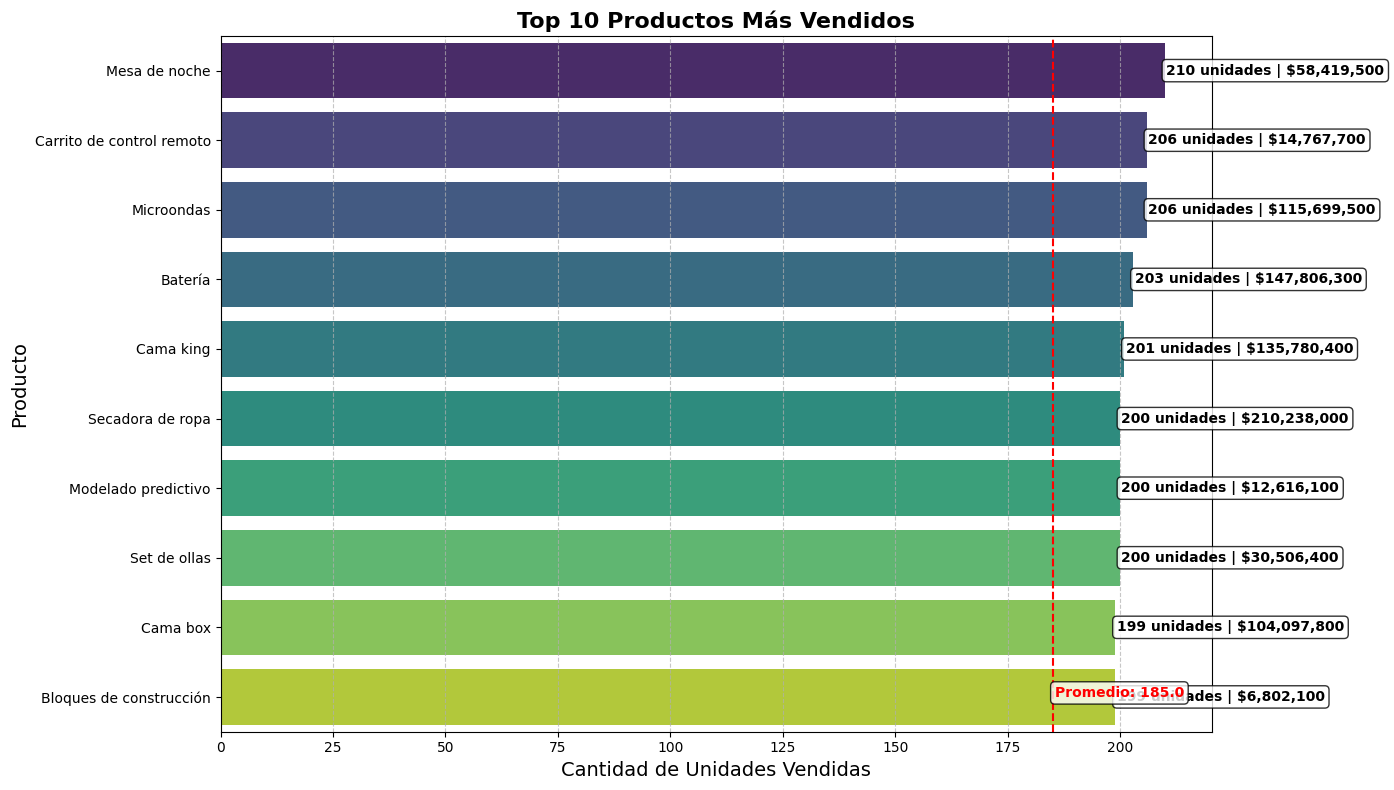

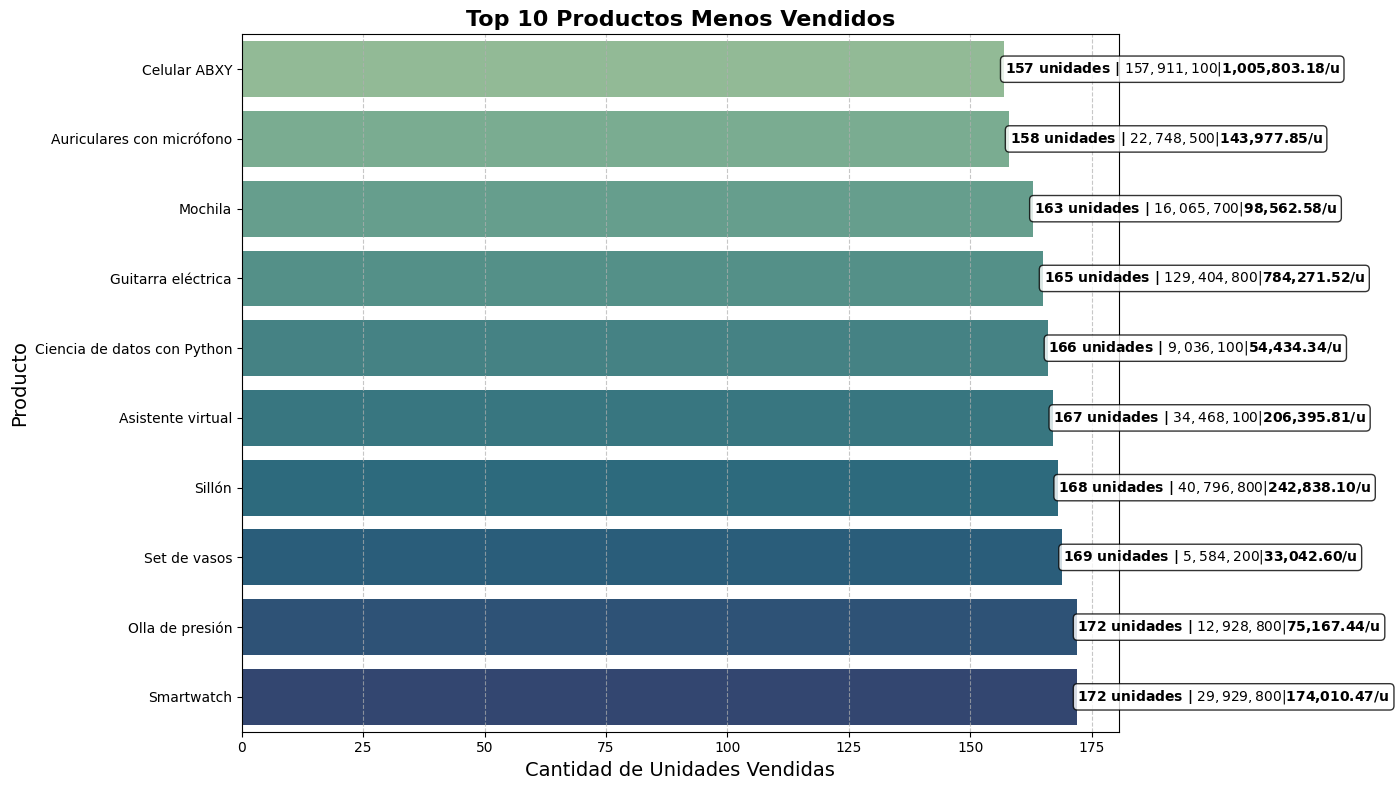

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Conteo de productos vendidos en todas las tiendas
conteo_productos = tiendas_completo["Producto"].value_counts().reset_index()
conteo_productos.columns = ["Producto", "Cantidad"]

# Calcular el valor total vendido por producto
valor_productos = tiendas_completo.groupby("Producto")["Precio"].sum().reset_index()
valor_productos.columns = ["Producto", "Valor Total"]

# Calcular el costo de envío promedio por producto
envio_productos = (
    tiendas_completo.groupby("Producto")["Costo de envío"].mean().reset_index()
)
envio_productos.columns = ["Producto", "Costo Envío Promedio"]

# Unir todos los dataframes
analisis_productos = pd.merge(conteo_productos, valor_productos, on="Producto")
analisis_productos = pd.merge(analisis_productos, envio_productos, on="Producto")

# Calcular precio promedio por producto
analisis_productos["Precio Promedio"] = (
    analisis_productos["Valor Total"] / analisis_productos["Cantidad"]
).round(2)

# Añadir categoría del producto
categorias_producto = tiendas_completo[
    ["Producto", "Categoría del Producto"]
].drop_duplicates()
analisis_productos = pd.merge(analisis_productos, categorias_producto, on="Producto")

# Ordenar por cantidad de ventas para obtener los más vendidos
mas_vendidos = analisis_productos.sort_values("Cantidad", ascending=False).head(10)
menos_vendidos = analisis_productos.sort_values("Cantidad", ascending=True).head(10)

# Estadísticas generales
print(f"Total de productos diferentes: {len(analisis_productos)}")
print(
    f"Producto más vendido: {mas_vendidos.iloc[0]['Producto']} con {mas_vendidos.iloc[0]['Cantidad']} unidades"
)
print(
    f"Producto menos vendido: {menos_vendidos.iloc[0]['Producto']} con {menos_vendidos.iloc[0]['Cantidad']} unidades"
)
print(f"Precio promedio más alto: ${analisis_productos['Precio Promedio'].max():,.2f}")
print(f"Precio promedio más bajo: ${analisis_productos['Precio Promedio'].min():,.2f}")

# Visualización de los 10 productos más vendidos
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Cantidad",
    y="Producto",
    data=mas_vendidos,
    palette="viridis",
    hue="Producto",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(
        width + 0.3,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f} unidades | ${mas_vendidos.iloc[i]['Valor Total']:,.0f}",
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

plt.title("Top 10 Productos Más Vendidos", fontsize=16, fontweight="bold")
plt.xlabel("Cantidad de Unidades Vendidas", fontsize=14)
plt.ylabel("Producto", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Añadir línea de promedio de ventas
promedio_ventas = analisis_productos["Cantidad"].mean()
plt.axvline(x=promedio_ventas, color="red", linestyle="--")
plt.text(
    promedio_ventas + 0.5,
    9,
    f"Promedio: {promedio_ventas:.1f}",
    color="red",
    fontsize=10,
    fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
)

plt.tight_layout()
plt.show()

# Visualización de los 10 productos menos vendidos
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Cantidad",
    y="Producto",
    data=menos_vendidos,
    palette="crest",
    hue="Producto",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(
        width + 0.1,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f} unidades | ${menos_vendidos.iloc[i]['Valor Total']:,.0f} | ${menos_vendidos.iloc[i]['Precio Promedio']:,.2f}/u",
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

plt.title("Top 10 Productos Menos Vendidos", fontsize=16, fontweight="bold")
plt.xlabel("Cantidad de Unidades Vendidas", fontsize=14)
plt.ylabel("Producto", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Análisis por tienda: Productos más vendidos en cada tienda

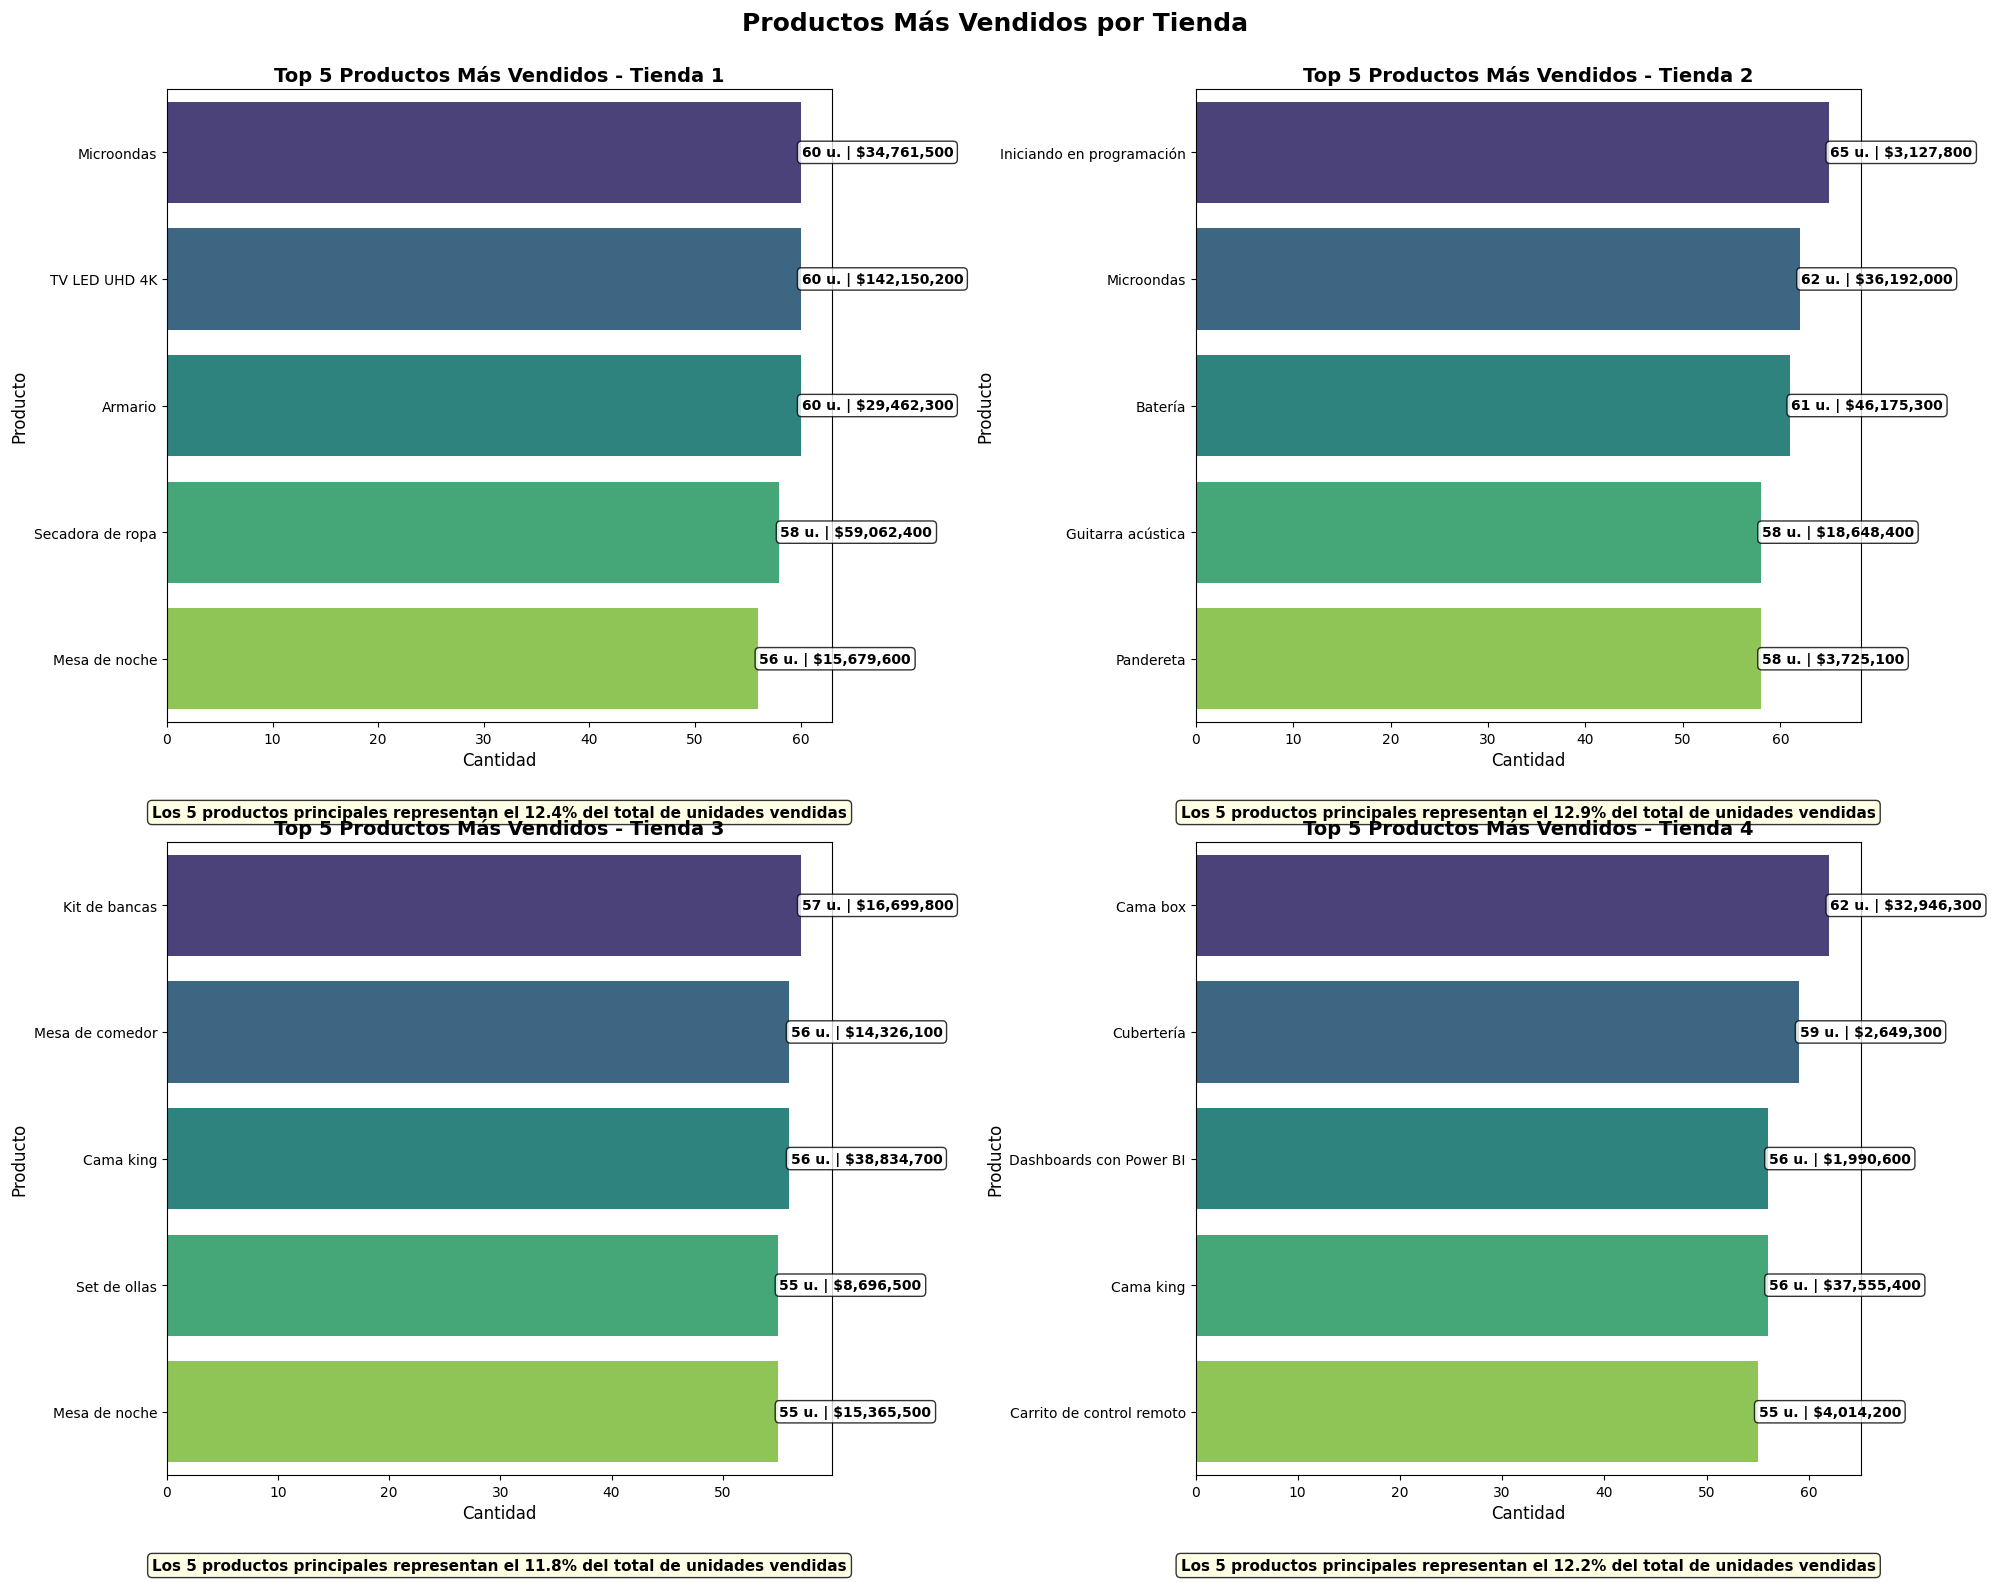


Análisis de productos más vendidos entre tiendas:
Los siguientes productos aparecen en el top 3 de más de una tienda:
- Microondas: presente en Tienda 1, Tienda 2

ANÁLISIS DE PARETO - CONCENTRACIÓN DE VENTAS:
Por valor: 16 de 51 productos (31.4%) 
generan el 78.7% del valor total de ventas.

Por cantidad: 39 de 51 productos (76.5%) 
representan el 78.7% del total de unidades vendidas.


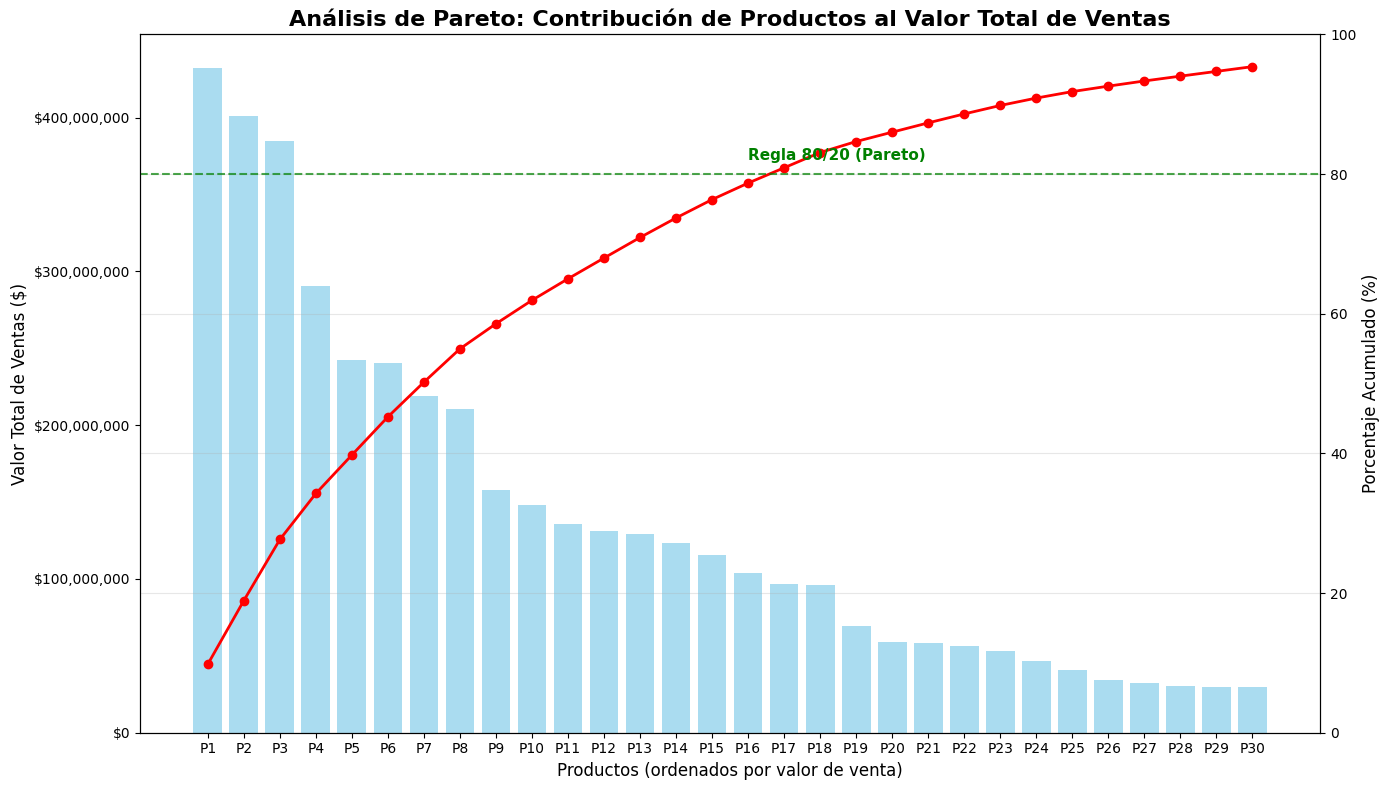


CONCLUSIONES DEL ANÁLISIS DE PRODUCTOS
1. El producto más vendido es 'Mesa de noche' con 210 unidades,
   generando $58,419,500.00 en ventas totales.
2. Análisis de Pareto: solo 16 productos
   (31.4% del catálogo) generan el 80% del valor total de ventas.
4. Aunque no es el más vendido en unidades, el producto 'TV LED UHD 4K'
   genera el mayor valor total: $432,489,600.00, representando el 9.82% del total.
8. La Tienda 2 muestra la mayor concentración de ventas en pocos productos:
   sus 5 productos principales representan el 12.9% de sus ventas totales.


In [21]:
from matplotlib.ticker import FuncFormatter

analisis_por_tienda = {}

tiendas = [tienda1, tienda2, tienda3, tienda4]

for idx, tienda_df in enumerate(tiendas, 1):
    # Conteo de productos
    conteo = tienda_df["Producto"].value_counts().reset_index()
    conteo.columns = ["Producto", "Cantidad"]

    # Valor total por producto
    valor = tienda_df.groupby("Producto")["Precio"].sum().reset_index()
    valor.columns = ["Producto", "Valor Total"]

    # Unir ambos
    analisis = pd.merge(conteo, valor, on="Producto")
    analisis["Precio Promedio"] = (
        analisis["Valor Total"] / analisis["Cantidad"]
    ).round(2)

    # Calcular porcentajes y métricas acumuladas
    total_cantidad = analisis["Cantidad"].sum()
    total_valor = analisis["Valor Total"].sum()
    analisis["% del Total (Cantidad)"] = (
        analisis["Cantidad"] / total_cantidad * 100
    ).round(2)
    analisis["% del Total (Valor)"] = (
        analisis["Valor Total"] / total_valor * 100
    ).round(2)

    # Guardar en el diccionario
    analisis_por_tienda[f"Tienda {idx}"] = analisis.sort_values(
        "Cantidad", ascending=False
    )

# Crear una figura para visualizar los 5 productos más vendidos por tienda
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, (tienda, analisis) in enumerate(analisis_por_tienda.items()):
    # Obtener los 5 más vendidos
    top5 = analisis.head(5)

    # Crear gráfico con datos de cantidad y valor
    bars = sns.barplot(
        x="Cantidad",
        y="Producto",
        hue="Producto",
        data=top5,
        palette="viridis",
        legend=False,
        ax=axes[i],
    )

    axes[i].set_title(
        f"Top 5 Productos Más Vendidos - {tienda}", fontsize=14, fontweight="bold"
    )
    axes[i].set_xlabel("Cantidad", fontsize=12)
    axes[i].set_ylabel("Producto", fontsize=12)

    # Añadir etiquetas con valor total y porcentaje
    for j, p in enumerate(axes[i].patches):
        width = p.get_width()
        info_text = f"{width:.0f} u. | ${top5.iloc[j]['Valor Total']:,.0f}"
        axes[i].text(
            width + 0.1,
            p.get_y() + p.get_height() / 2,
            info_text,
            ha="left",
            va="center",
            fontsize=10,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        )

    # Añadir texto informativo sobre la concentración de ventas
    top5_pct = top5["% del Total (Cantidad)"].sum().round(1)
    axes[i].text(
        0.5,
        -0.15,
        f"Los 5 productos principales representan el {top5_pct}% del total de unidades vendidas",
        ha="center",
        transform=axes[i].transAxes,
        fontsize=11,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8),
    )

plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle("Productos Más Vendidos por Tienda", fontsize=18, fontweight="bold")
plt.show()

# Obtener los 3 productos más vendidos de cada tienda
top_productos = {}
for tienda, analisis in analisis_por_tienda.items():
    top_productos[tienda] = set(analisis.head(3)["Producto"])

# Encontrar productos que aparecen en el top 3 de más de una tienda
productos_recurrentes = set()
for tienda1, prods1 in top_productos.items():
    for tienda2, prods2 in top_productos.items():
        if tienda1 != tienda2:
            productos_recurrentes.update(prods1.intersection(prods2))

print(f"\nAnálisis de productos más vendidos entre tiendas:\n" + "=" * 50)
if productos_recurrentes:
    print(f"Los siguientes productos aparecen en el top 3 de más de una tienda:")
    for prod in productos_recurrentes:
        tiendas_presentes = [t for t, ps in top_productos.items() if prod in ps]
        print(f"- {prod}: presente en {', '.join(tiendas_presentes)}")
else:
    print("No hay productos que aparezcan en el top 3 de más de una tienda.")


# Análisis del impacto financiero de los productos más y menos vendidos

# Agregar columna de contribución porcentual acumulada para análisis de Pareto
analisis_productos = analisis_productos.sort_values(
    "Valor Total", ascending=False
).reset_index(drop=True)

# Asegurarse de que existan las columnas de porcentaje
if "% del Total (Valor)" not in analisis_productos.columns:
    analisis_productos["% del Total (Valor)"] = (
        analisis_productos["Valor Total"]
        / analisis_productos["Valor Total"].sum()
        * 100
    ).round(2)
if "% del Total (Cantidad)" not in analisis_productos.columns:
    analisis_productos["% del Total (Cantidad)"] = (
        analisis_productos["Cantidad"] / analisis_productos["Cantidad"].sum() * 100
    ).round(2)

analisis_productos["% Acumulado (Valor)"] = analisis_productos[
    "% del Total (Valor)"
].cumsum()
analisis_productos["% Acumulado (Cantidad)"] = (
    analisis_productos["% del Total (Cantidad)"].sort_values(ascending=False).cumsum()
)

# Identificar cuántos productos representan el 80% de las ventas (regla de Pareto)
productos_80_valor = analisis_productos[analisis_productos["% Acumulado (Valor)"] <= 80]
productos_80_cantidad = analisis_productos[
    analisis_productos["% Acumulado (Cantidad)"] <= 80
]

print(f"\nANÁLISIS DE PARETO - CONCENTRACIÓN DE VENTAS:\n" + "=" * 50)
print(
    f"Por valor: {len(productos_80_valor)} de {len(analisis_productos)} productos ({(len(productos_80_valor)/len(analisis_productos)*100):.1f}%) "
)
print(
    f"generan el {productos_80_valor['% del Total (Valor)'].sum():.1f}% del valor total de ventas."
)

print(
    f"\nPor cantidad: {len(productos_80_cantidad)} de {len(analisis_productos)} productos ({(len(productos_80_cantidad)/len(analisis_productos)*100):.1f}%) "
)
print(
    f"representan el {productos_80_cantidad['% del Total (Cantidad)'].sum():.1f}% del total de unidades vendidas."
)

# Visualización de la curva de Pareto para valor de ventas
plt.figure(figsize=(14, 8))

# Crear gráfico de barras para el valor de ventas por producto (top 30)
top30 = analisis_productos.head(30)
x = range(len(top30))
y1 = top30["Valor Total"]

ax1 = plt.subplot()
ax1.bar(x, y1, color="skyblue", alpha=0.7)
ax1.set_ylabel("Valor Total de Ventas ($)", fontsize=12)
ax1.set_xlabel("Productos (ordenados por valor de venta)", fontsize=12)

# Formato de moneda para el eje y
fmt = lambda x, pos: f"${x:,.0f}"
ax1.yaxis.set_major_formatter(FuncFormatter(fmt))

# Crear línea para el porcentaje acumulado
ax2 = ax1.twinx()
y2 = top30["% Acumulado (Valor)"]
ax2.plot(x, y2, "ro-", linewidth=2, markersize=6)
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.set_ylim([0, 100])

# Añadir línea de 80% (regla de Pareto)
ax2.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax2.text(
    len(x) / 2,
    82,
    "Regla 80/20 (Pareto)",
    color="green",
    fontsize=11,
    fontweight="bold",
)

# Añadir títulos y etiquetas
plt.title(
    "Análisis de Pareto: Contribución de Productos al Valor Total de Ventas",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(x, [f"P{i+1}" for i in x], rotation=90)
plt.grid(axis="y", alpha=0.3)

# Añadir etiquetas para los primeros productos
for i in range(min(5, len(top30))):
    plt.annotate(
        f"{top30.iloc[i]['Producto'][:15]}{'...' if len(top30.iloc[i]['Producto']) > 15 else ''}",
        xy=(i, top30.iloc[i]["Valor Total"]),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        rotation=45,
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3),
    )

plt.tight_layout()
plt.show()

# Conclusiones sobre el análisis de productos
print("\nCONCLUSIONES DEL ANÁLISIS DE PRODUCTOS\n" + "=" * 50)

# Productos más vendidos
top_producto = mas_vendidos.iloc[0]
print(
    f"1. El producto más vendido es '{top_producto['Producto']}' con {top_producto['Cantidad']} unidades,"
)
print(f"   generando ${top_producto['Valor Total']:,.2f} en ventas totales.")

# Concentración de ventas
print(f"2. Análisis de Pareto: solo {len(productos_80_valor)} productos")
print(
    f"   ({(len(productos_80_valor)/len(analisis_productos)*100):.1f}% del catálogo) generan el 80% del valor total de ventas."
)


# Productos de alto valor
top_valor = analisis_productos.nlargest(1, "Valor Total").iloc[0]
if top_valor["Producto"] != top_producto["Producto"]:
    print(
        f"4. Aunque no es el más vendido en unidades, el producto '{top_valor['Producto']}'"
    )
    print(
        f"   genera el mayor valor total: ${top_valor['Valor Total']:,.2f}, representando el {top_valor['% del Total (Valor)']:.2f}% del total."
    )

# Concentración por tienda
top5_concentracion = [
    analisis_por_tienda[f"Tienda {i}"].head(5)["% del Total (Cantidad)"].sum().round(1)
    for i in range(1, 5)
]
tienda_mayor_concentracion = np.argmax(top5_concentracion) + 1
print(
    f"8. La Tienda {tienda_mayor_concentracion} muestra la mayor concentración de ventas en pocos productos:"
)
print(
    f"   sus 5 productos principales representan el {max(top5_concentracion)}% de sus ventas totales."
)

## Dashboard resumen del análisis de productos

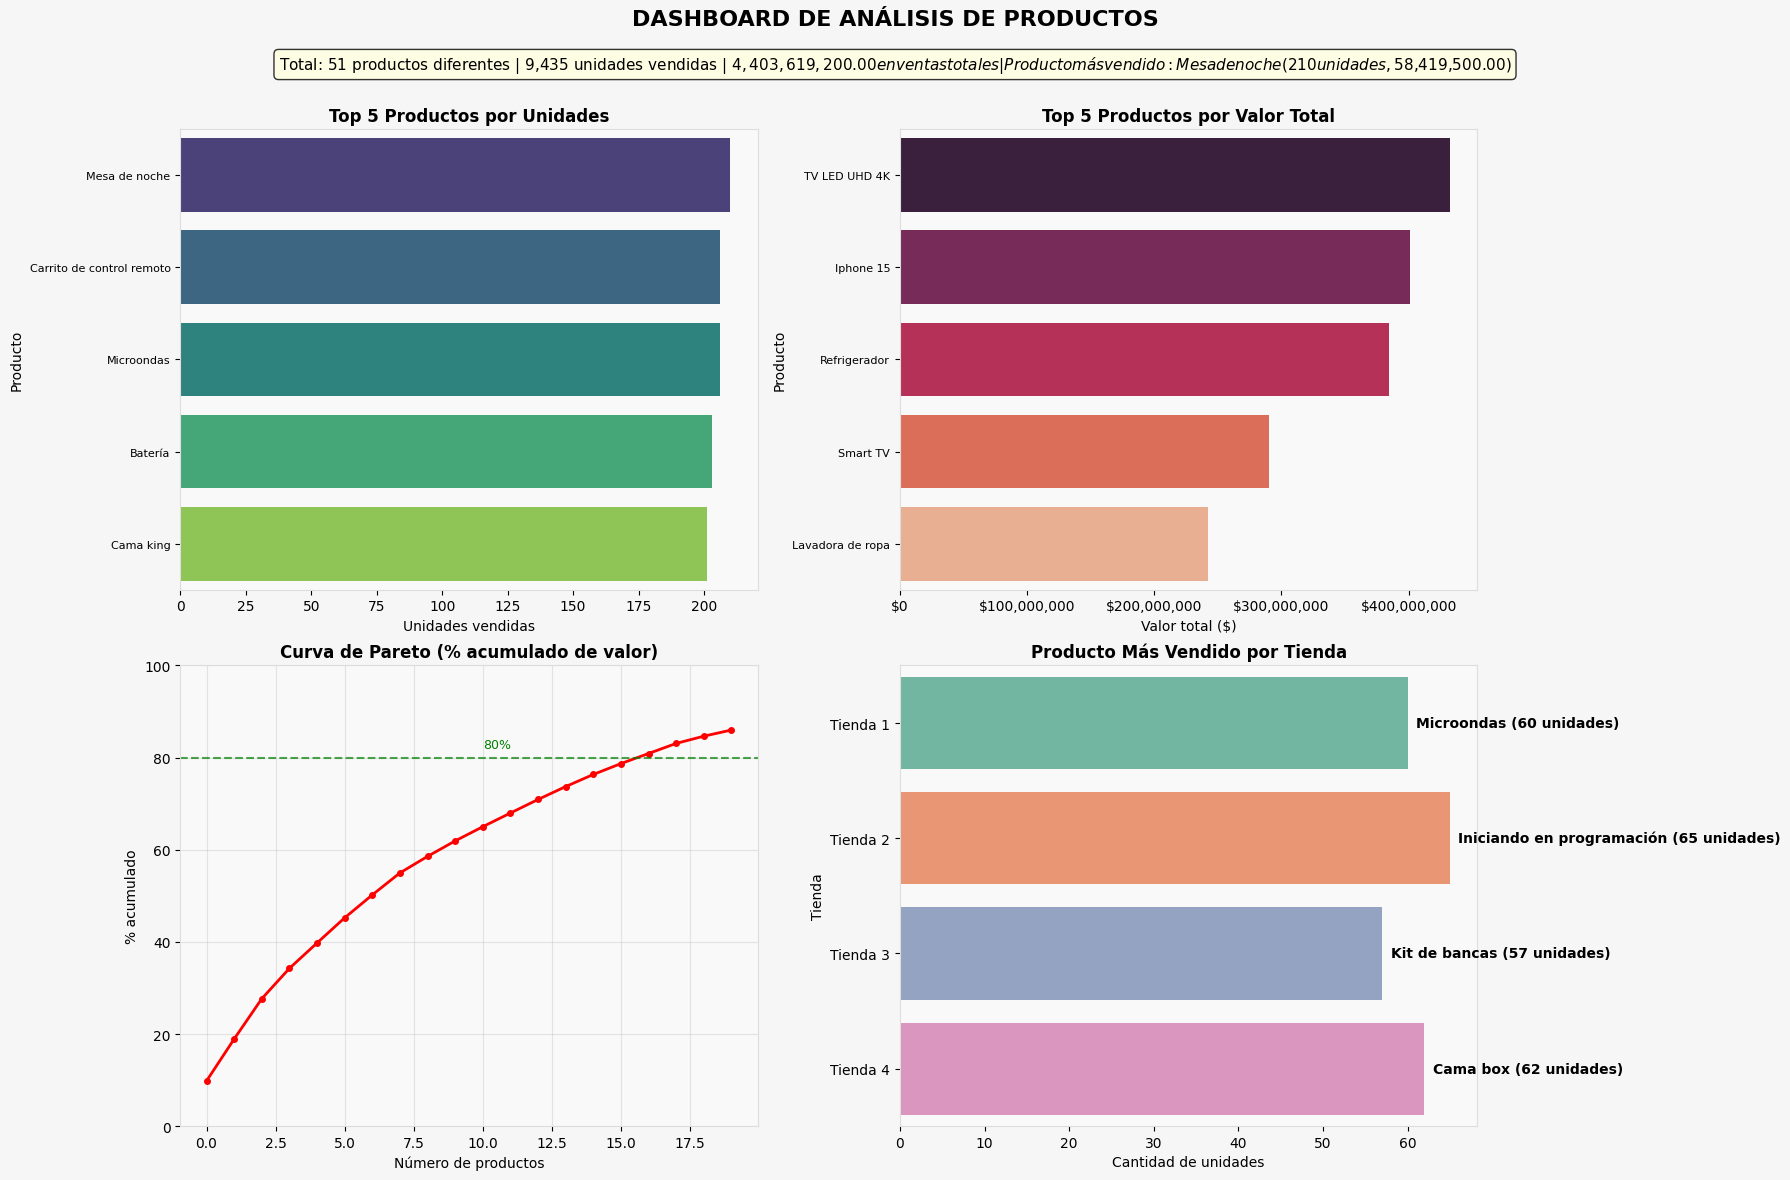

In [ ]:
# KPIs principales
total_diferentes = len(analisis_productos)
total_unidades = analisis_productos["Cantidad"].sum()
total_ventas = analisis_productos["Valor Total"].sum()
producto_estrella = mas_vendidos.iloc[0]["Producto"]
unidades_estrella = mas_vendidos.iloc[0]["Cantidad"]
valor_estrella = mas_vendidos.iloc[0]["Valor Total"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Configurar el aspecto visual de la figura
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.patch.set_facecolor("#f6f6f6")
for ax in axes:
    ax.set_facecolor("#f9f9f9")
    for spine in ax.spines.values():
        spine.set_edgecolor("#dddddd")

# 1. Top 5 productos por unidades vendidas
ax1 = axes[0]
top5_unidades = mas_vendidos.head(5)
sns.barplot(
    x="Cantidad",
    y="Producto",
    hue="Producto",
    data=top5_unidades,
    palette="viridis",
    legend=False,
    ax=ax1,
)
ax1.set_title("Top 5 Productos por Unidades", fontsize=12, fontweight="bold")
ax1.set_xlabel("Unidades vendidas")
ax1.tick_params(axis="y", labelsize=8)

# 2. Top 5 productos por valor total
ax2 = axes[1]
top5_valor = analisis_productos.nlargest(5, "Valor Total")
sns.barplot(
    x="Valor Total",
    y="Producto",
    hue="Producto",
    data=top5_valor,
    palette="rocket",
    legend=False,
    ax=ax2,
)
ax2.set_title("Top 5 Productos por Valor Total", fontsize=12, fontweight="bold")
ax2.set_xlabel("Valor total ($)")
ax2.tick_params(axis="y", labelsize=8)
fmt = lambda x, pos: f"${x:,.0f}"
ax2.xaxis.set_major_formatter(FuncFormatter(fmt))

# 3. Análisis de Pareto (curva acumulada)
ax3 = axes[2]
top20 = analisis_productos.head(20)
x = range(len(top20))
y = top20["% Acumulado (Valor)"]
ax3.plot(x, y, "ro-", linewidth=2, markersize=4)
ax3.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax3.text(len(x) / 2, 82, "80%", color="green", fontsize=9)
ax3.set_title("Curva de Pareto (% acumulado de valor)", fontsize=12, fontweight="bold")
ax3.set_xlabel("Número de productos")
ax3.set_ylabel("% acumulado")
ax3.set_ylim(0, 100)
ax3.grid(alpha=0.3)

# 4. Producto mas Vendido por Tienda
ax4 = axes[3]

# Obtener el producto más vendido por tienda
top_por_tienda = pd.DataFrame(columns=["Tienda", "Producto", "Cantidad"])
for i, tienda in enumerate(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], 1):
    analisis = analisis_por_tienda[f"Tienda {i}"]
    top_prod = analisis.iloc[0]  # El más vendido (ya están ordenados)
    top_por_tienda.loc[i - 1] = [tienda, top_prod["Producto"], top_prod["Cantidad"]]

# Crear gráfico de barras horizontales
sns.barplot(
    x="Cantidad",
    y="Tienda",
    hue="Tienda",
    data=top_por_tienda,
    palette="Set2",
    legend=False,
    ax=ax4,
)

# Añadir etiquetas con nombre de producto
for i, row in top_por_tienda.iterrows():
    ax4.text(
        row["Cantidad"] + 1,
        i,
        f"{row['Producto']} ({row['Cantidad']} unidades)",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

ax4.set_title("Producto Más Vendido por Tienda", fontsize=12, fontweight="bold")
ax4.set_xlabel("Cantidad de unidades")
ax4.set_ylabel("Tienda")


# Añadir título principal
fig.suptitle(
    "DASHBOARD DE ANÁLISIS DE PRODUCTOS", fontsize=16, fontweight="bold", y=0.98
)

# Añadir KPIs clave como texto en la parte superior
texto_kpis = f"Total: {total_diferentes} productos diferentes | {total_unidades:,} unidades vendidas | ${total_ventas:,.2f} en ventas totales | Producto más vendido: {producto_estrella} ({unidades_estrella:,} unidades, ${valor_estrella:,.2f})"
fig.text(
    0.5,
    0.93,
    texto_kpis,
    ha="center",
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8),
)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# 5. Envío promedio por tienda

En esta sección analizamos los costos de envío promedio de cada tienda, un factor crítico que impacta directamente la competitividad de precios y la satisfacción del cliente. El análisis incluye:

- Comparación de costos de envío promedio entre tiendas
- Distribución estadística de los costos de envío (mediana, desviación estándar, valores mínimos y máximos)
- Análisis de la variabilidad de costos mediante el coeficiente de variación
- Relación entre costos de envío y categorías de productos
- Proporción que representa el envío respecto al precio del producto
- Correlación entre precio del producto y costo de envío

Este análisis proporciona información valiosa para optimizar estrategias logísticas y políticas de envío.

## Análisis de costos de envío por tienda

ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA
     Tienda Envío Promedio Envío Mediana Desviación Estándar Mínimo  \
0  Tienda 1      $26018.61     $12400.00           $32860.00  $0.00   
1  Tienda 2      $25216.24     $11600.00           $31741.38  $0.00   
2  Tienda 3      $24805.68     $11900.00           $30945.89  $0.00   
3  Tienda 4      $23459.46     $10950.00           $30279.10  $0.00   

       Máximo Coef. Variación (%)  
0  $160800.00             126.29%  
1  $162500.00             125.88%  
2  $158400.00             124.75%  
3  $154700.00             129.07%  


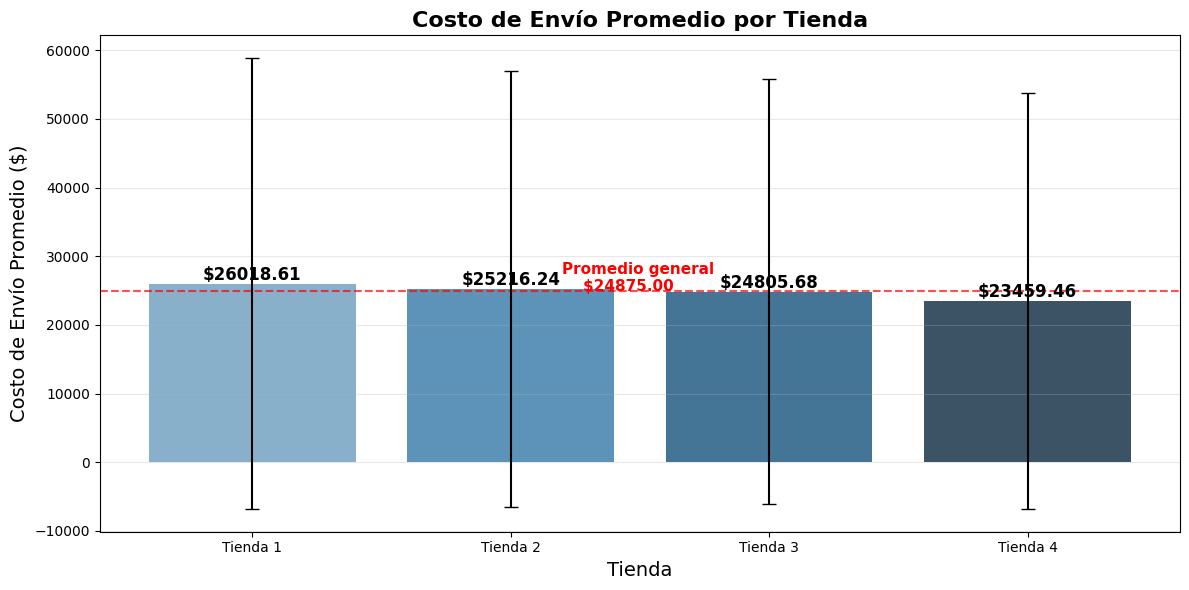

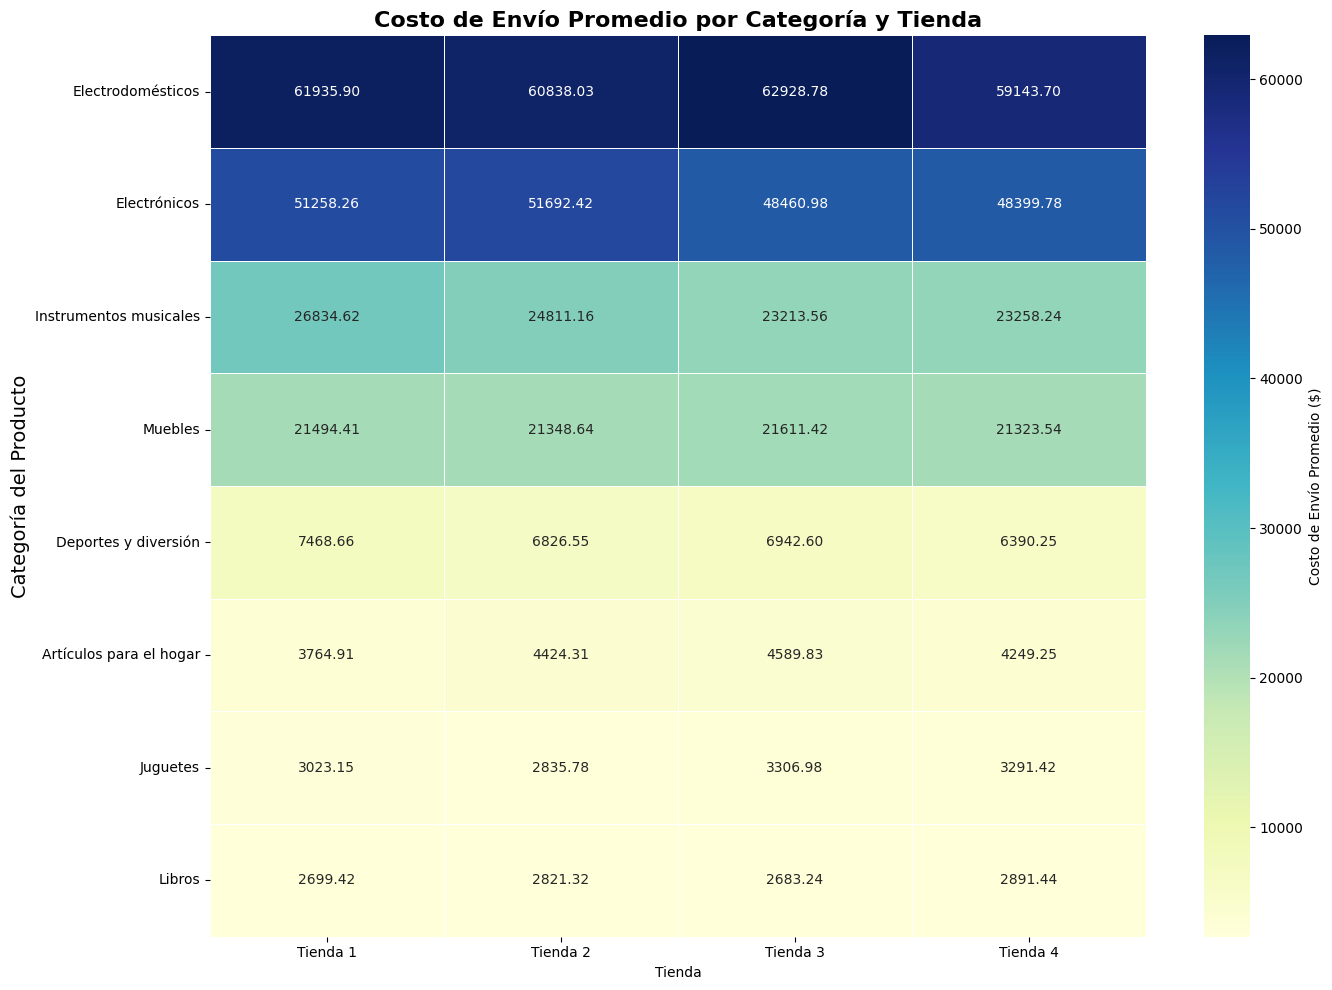

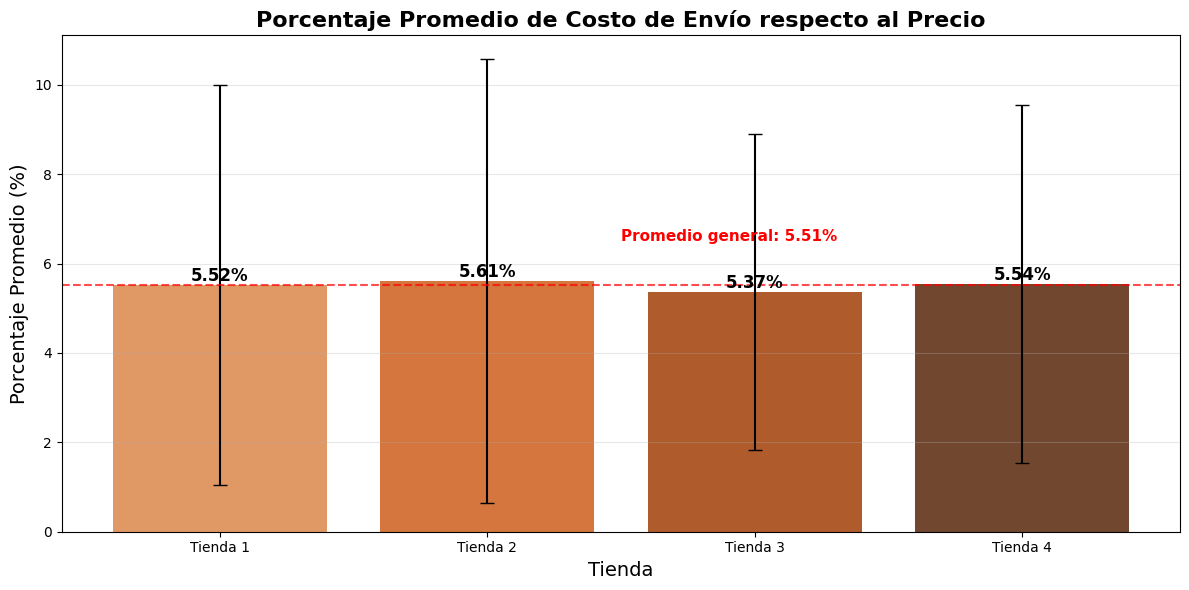

In [ ]:
# Análisis de costos de envío por tienda
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Calcular el costo de envío promedio para cada tienda
envio_promedio_t1 = tienda1["Costo de envío"].mean()
envio_promedio_t2 = tienda2["Costo de envío"].mean()
envio_promedio_t3 = tienda3["Costo de envío"].mean()
envio_promedio_t4 = tienda4["Costo de envío"].mean()

# Calcular estadísticas adicionales para análisis más profundo
envio_mediana_t1 = tienda1["Costo de envío"].median()
envio_mediana_t2 = tienda2["Costo de envío"].median()
envio_mediana_t3 = tienda3["Costo de envío"].median()
envio_mediana_t4 = tienda4["Costo de envío"].median()

envio_std_t1 = tienda1["Costo de envío"].std()
envio_std_t2 = tienda2["Costo de envío"].std()
envio_std_t3 = tienda3["Costo de envío"].std()
envio_std_t4 = tienda4["Costo de envío"].std()

envio_min_t1 = tienda1["Costo de envío"].min()
envio_min_t2 = tienda2["Costo de envío"].min()
envio_min_t3 = tienda3["Costo de envío"].min()
envio_min_t4 = tienda4["Costo de envío"].min()

envio_max_t1 = tienda1["Costo de envío"].max()
envio_max_t2 = tienda2["Costo de envío"].max()
envio_max_t3 = tienda3["Costo de envío"].max()
envio_max_t4 = tienda4["Costo de envío"].max()

# Crear un DataFrame para mostrar todas las estadísticas
estadisticas_envio = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Envío Promedio": [
            envio_promedio_t1,
            envio_promedio_t2,
            envio_promedio_t3,
            envio_promedio_t4,
        ],
        "Envío Mediana": [
            envio_mediana_t1,
            envio_mediana_t2,
            envio_mediana_t3,
            envio_mediana_t4,
        ],
        "Desviación Estándar": [envio_std_t1, envio_std_t2, envio_std_t3, envio_std_t4],
        "Mínimo": [envio_min_t1, envio_min_t2, envio_min_t3, envio_min_t4],
        "Máximo": [envio_max_t1, envio_max_t2, envio_max_t3, envio_max_t4],
        "Coef. Variación (%)": [
            (envio_std_t1 / envio_promedio_t1 * 100).round(2),
            (envio_std_t2 / envio_promedio_t2 * 100).round(2),
            (envio_std_t3 / envio_promedio_t3 * 100).round(2),
            (envio_std_t4 / envio_promedio_t4 * 100).round(2),
        ],
    }
)

# Formatear los valores para mejor visualización
estadisticas_envio_formato = estadisticas_envio.copy()
for col in [
    "Envío Promedio",
    "Envío Mediana",
    "Desviación Estándar",
    "Mínimo",
    "Máximo",
]:
    estadisticas_envio_formato[col] = estadisticas_envio_formato[col].apply(
        lambda x: f"${x:.2f}"
    )

estadisticas_envio_formato["Coef. Variación (%)"] = estadisticas_envio_formato[
    "Coef. Variación (%)"
].apply(lambda x: f"{x}%")

# Mostrar la tabla de estadísticas
print("ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA")
print("=" * 50)
print(estadisticas_envio_formato)

# 1. Gráfico de barras comparativo para envío promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Envío Promedio",
    hue="Tienda",
    data=estadisticas_envio,
    palette="Blues_d",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"${estadisticas_envio['Envío Promedio'][i]:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir línea para el promedio general
promedio_general = estadisticas_envio["Envío Promedio"].mean()
plt.axhline(y=promedio_general, color="red", linestyle="--", alpha=0.7)
plt.text(
    1.2,
    promedio_general + 0.5,
    f"Promedio general\n    ${promedio_general:.2f}",
    color="red",
    fontsize=11,
    fontweight="bold",
)

# Mejoras estéticas
plt.title("Costo de Envío Promedio por Tienda", fontsize=16, fontweight="bold")
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Costo de Envío Promedio ($)", fontsize=14)
plt.grid(axis="y", alpha=0.3)

# Añadir barras de error que muestren la desviación estándar
plt.errorbar(
    x=range(len(estadisticas_envio)),
    y=estadisticas_envio["Envío Promedio"],
    yerr=estadisticas_envio["Desviación Estándar"],
    fmt="none",
    color="black",
    capsize=5,
)

plt.tight_layout()
plt.show()

# 2. Análisis por categoría de producto

tiendas_df = pd.concat(
    [tienda1, tienda2, tienda3, tienda4],
    keys=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
)
tiendas_df = tiendas_df.reset_index()
tiendas_df = tiendas_df.rename(columns={"level_0": "Tienda", "level_1": "ID_registro"})
tiendas_df = tiendas_df.drop("ID_registro", axis=1)

tiendas_df = tiendas_df.loc[:, ~tiendas_df.columns.duplicated()]

# Calcular el costo de envío promedio por categoría y tienda
envio_categoria = (
    tiendas_df.groupby(["Tienda", "Categoría del Producto"])["Costo de envío"]
    .mean()
    .reset_index()
)

# Pivot para crear tabla de tiendas x categorías
envio_pivot = envio_categoria.pivot(
    index="Categoría del Producto", columns="Tienda", values="Costo de envío"
)

# Calcular el envío promedio total por categoría y ordenar
envio_pivot["Promedio"] = envio_pivot.mean(axis=1)
envio_pivot = envio_pivot.sort_values("Promedio", ascending=False)

# Crear heatmap para visualizar
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    envio_pivot.drop("Promedio", axis=1),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Costo de Envío Promedio ($)"},
)

plt.title(
    "Costo de Envío Promedio por Categoría y Tienda", fontsize=16, fontweight="bold"
)
plt.ylabel("Categoría del Producto", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Análisis del costo de envío como porcentaje del precio
tiendas_df["Porcentaje Envío/Precio"] = (
    tiendas_df["Costo de envío"] / tiendas_df["Precio"] * 100
).round(2)

# Calcular porcentajes promedio por tienda
porcentaje_por_tienda = (
    tiendas_df.groupby("Tienda")["Porcentaje Envío/Precio"]
    .agg(["mean", "median", "std", "min", "max"])
    .reset_index()
)
porcentaje_por_tienda.columns = [
    "Tienda",
    "Media",
    "Mediana",
    "Desv. Estándar",
    "Mínimo",
    "Máximo",
]

# Crear gráfico de barras para porcentaje promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Media",
    hue="Tienda",
    data=porcentaje_por_tienda,
    palette="Oranges_d",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{porcentaje_por_tienda['Media'][i]:.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir barras de error
plt.errorbar(
    x=range(len(porcentaje_por_tienda)),
    y=porcentaje_por_tienda["Media"],
    yerr=porcentaje_por_tienda["Desv. Estándar"],
    fmt="none",
    color="black",
    capsize=5,
)

# Añadir línea promedio general
promedio_general_pct = porcentaje_por_tienda["Media"].mean()
plt.axhline(y=promedio_general_pct, color="red", linestyle="--", alpha=0.7)
plt.text(
    1.5,
    promedio_general_pct + 1,
    f"Promedio general: {promedio_general_pct:.2f}%",
    color="red",
    fontsize=11,
    fontweight="bold",
)

plt.title(
    "Porcentaje Promedio de Costo de Envío respecto al Precio",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Porcentaje Promedio (%)", fontsize=14)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis e interpretación de costos de envío


CONCLUSIONES DEL ANÁLISIS DE COSTOS DE ENVÍO
1. Tienda 4 ofrece el costo de envío promedio más bajo ($23459.46), mientras que
   Tienda 1 tiene el más alto ($26018.61), una diferencia del 10.91%.

2. Tienda 3 muestra la mayor consistencia en sus costos de envío con un coeficiente
   de variación de 124.75%, lo que indica políticas de envío más estables.
   En contraste, Tienda 4 presenta mayor variabilidad (129.07%).

3. Los productos de la categoría 'Electrodomésticos' tienen los costos de envío
   más altos ($61211.60 en promedio), posiblemente debido a su tamaño, peso o fragilidad.
   La categoría 'Libros' tiene los envíos más económicos ($2773.86).

4. En Tienda 1 se observa la correlación más fuerte entre precio del producto y costo de envío
   (r = 0.998), lo que sugiere que esta tienda ajusta sus costos de envío
   en proporción al valor del producto más que las otras tiendas.

5. Tienda 2 tiene la mayor proporción de costos de envío respecto al precio de los productos
   (5.61

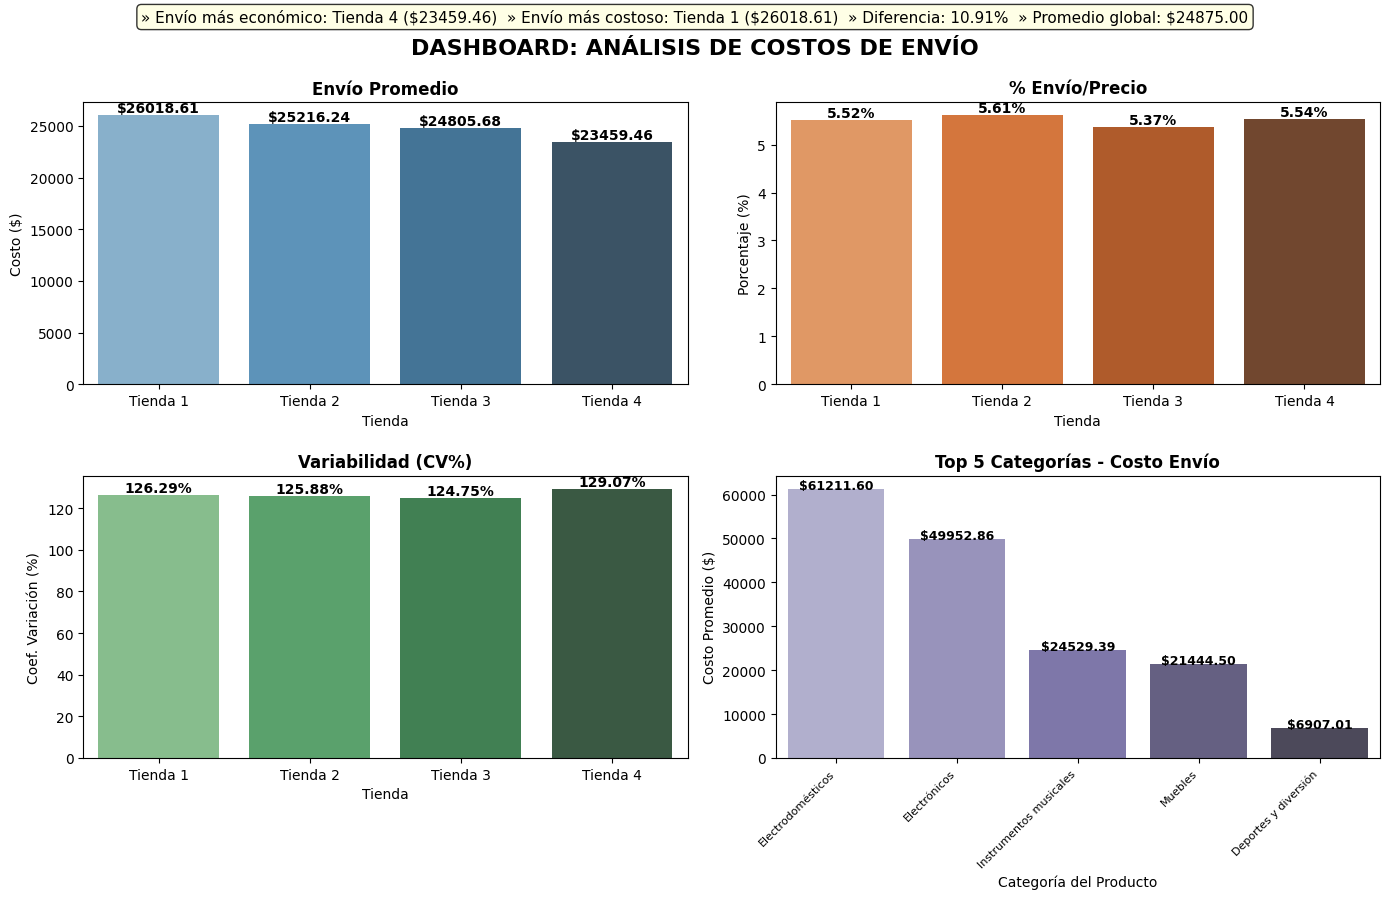

In [ ]:
# Identificar la tienda con envío más barato y más caro
tienda_envio_mas_bajo = estadisticas_envio.loc[
    estadisticas_envio["Envío Promedio"].idxmin()
]["Tienda"]
costo_mas_bajo = estadisticas_envio["Envío Promedio"].min()

tienda_envio_mas_alto = estadisticas_envio.loc[
    estadisticas_envio["Envío Promedio"].idxmax()
]["Tienda"]
costo_mas_alto = estadisticas_envio["Envío Promedio"].max()

# Identificar la tienda con mayor y menor variabilidad
tienda_mas_consistente = estadisticas_envio.loc[
    estadisticas_envio["Coef. Variación (%)"].idxmin()
]["Tienda"]
cv_mas_bajo = estadisticas_envio["Coef. Variación (%)"].min()

tienda_menos_consistente = estadisticas_envio.loc[
    estadisticas_envio["Coef. Variación (%)"].idxmax()
]["Tienda"]
cv_mas_alto = estadisticas_envio["Coef. Variación (%)"].max()

# Identificar categorías con envíos más caros y más baratos
categoria_envio_mas_alto = envio_pivot.index[0]
costo_categoria_alto = envio_pivot["Promedio"].max()

categoria_envio_mas_bajo = envio_pivot.index[-1]
costo_categoria_bajo = envio_pivot["Promedio"].min()

# Analizar correlaciones precio-envío
max_corr_tienda = max(tendencia_tiendas.items(), key=lambda x: abs(x[1]))[0]
max_corr_valor = max(tendencia_tiendas.items(), key=lambda x: abs(x[1]))[1]

# Calcular la diferencia porcentual entre la tienda más cara y más barata
diferencia_porcentual = (
    (costo_mas_alto - costo_mas_bajo) / costo_mas_bajo * 100
).round(2)

# Mostrar análisis final
print("\nCONCLUSIONES DEL ANÁLISIS DE COSTOS DE ENVÍO\n" + "=" * 50)
print(
    f"1. {tienda_envio_mas_bajo} ofrece el costo de envío promedio más bajo (${costo_mas_bajo:.2f}), mientras que"
)
print(
    f"   {tienda_envio_mas_alto} tiene el más alto (${costo_mas_alto:.2f}), una diferencia del {diferencia_porcentual}%."
)

print(
    f"\n2. {tienda_mas_consistente} muestra la mayor consistencia en sus costos de envío con un coeficiente"
)
print(
    f"   de variación de {cv_mas_bajo:.2f}%, lo que indica políticas de envío más estables."
)
print(
    f"   En contraste, {tienda_menos_consistente} presenta mayor variabilidad ({cv_mas_alto:.2f}%)."
)

print(
    f"\n3. Los productos de la categoría '{categoria_envio_mas_alto}' tienen los costos de envío"
)
print(
    f"   más altos (${costo_categoria_alto:.2f} en promedio), posiblemente debido a su tamaño, peso o fragilidad."
)
print(
    f"   La categoría '{categoria_envio_mas_bajo}' tiene los envíos más económicos (${costo_categoria_bajo:.2f})."
)

print(
    f"\n4. En {max_corr_tienda} se observa la correlación más fuerte entre precio del producto y costo de envío"
)
print(
    f"   (r = {max_corr_valor:.3f}), lo que sugiere que esta tienda ajusta sus costos de envío"
)
print(f"   en proporción al valor del producto más que las otras tiendas.")

# Destacar hallazgos clave sobre el porcentaje que representa el envío respecto al precio
tienda_mayor_porcentaje = porcentaje_por_tienda.loc[
    porcentaje_por_tienda["Media"].idxmax()
]["Tienda"]
porcentaje_max = porcentaje_por_tienda["Media"].max()

tienda_menor_porcentaje = porcentaje_por_tienda.loc[
    porcentaje_por_tienda["Media"].idxmin()
]["Tienda"]
porcentaje_min = porcentaje_por_tienda["Media"].min()

print(
    f"\n5. {tienda_mayor_porcentaje} tiene la mayor proporción de costos de envío respecto al precio de los productos"
)
print(
    f"   ({porcentaje_max:.2f}%), mientras que {tienda_menor_porcentaje} tiene la menor ({porcentaje_min:.2f}%)."
)
print(
    f"   Esto afecta directamente la competitividad de precios finales para el cliente."
)

# Análisis de implicaciones para la estrategia de negocio
print("\nIMPLICACIONES PARA LA ESTRATEGIA DE NEGOCIO:")
print(
    "1. Oportunidad de optimización: Las tiendas con costos de envío más altos podrían"
)
print(
    "   revisar sus proveedores logísticos o políticas de envío para ser más competitivas."
)
print(
    "\n2. Experiencia del cliente: La consistencia en los costos de envío (menor variabilidad)"
)
print(
    "   puede mejorar la satisfacción del cliente al ofrecer precios más predecibles."
)
print(
    "\n3. Estrategia de precios: Para productos de categorías con altos costos de envío,"
)
print(
    "   podrían considerarse estrategias como envío gratuito al superar cierto valor de compra."
)
print(
    "\n4. Benchmarking: Las tiendas podrían adoptar prácticas de la tienda con menores costos"
)
print(
    f"   de envío ({tienda_envio_mas_bajo}) para mejorar sus propios márgenes y competitividad."
)

# Crear un dashboard resumen con KPIs clave
plt.figure(figsize=(14, 8))

# Configurar el aspecto visual de la figura
plt.style.use("seaborn-v0_8-pastel")
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Envío promedio por tienda
plt.subplot(2, 2, 1)
# Corrección: Asignar 'Tienda' tanto a 'x' como a 'hue' con legend=False
ax1 = sns.barplot(
    x="Tienda",
    y="Envío Promedio",
    hue="Tienda",
    data=estadisticas_envio,
    palette="Blues_d",
    legend=False,
)
ax1.set_title("Envío Promedio", fontsize=12, fontweight="bold")
ax1.set_ylabel("Costo ($)")
for i, p in enumerate(ax1.patches):
    ax1.annotate(
        f"${estadisticas_envio['Envío Promedio'][i]:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# 2. Porcentaje envío/precio por tienda
plt.subplot(2, 2, 2)
# Corrección: Asignar 'Tienda' tanto a 'x' como a 'hue' con legend=False
ax2 = sns.barplot(
    x="Tienda",
    y="Media",
    hue="Tienda",
    data=porcentaje_por_tienda,
    palette="Oranges_d",
    legend=False,
)
ax2.set_title("% Envío/Precio", fontsize=12, fontweight="bold")
ax2.set_ylabel("Porcentaje (%)")
for i, p in enumerate(ax2.patches):
    ax2.annotate(
        f"{porcentaje_por_tienda['Media'][i]:.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# 3. Variabilidad de costos de envío
plt.subplot(2, 2, 3)
# Corrección: Asignar 'Tienda' tanto a 'x' como a 'hue' con legend=False
ax3 = sns.barplot(
    x="Tienda",
    y="Coef. Variación (%)",
    hue="Tienda",
    data=estadisticas_envio,
    palette="Greens_d",
    legend=False,
)
ax3.set_title("Variabilidad (CV%)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Coef. Variación (%)")
for i, p in enumerate(ax3.patches):
    ax3.annotate(
        f"{estadisticas_envio['Coef. Variación (%)'][i]:.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# 4. Top 5 categorías con mayor costo de envío
plt.subplot(2, 2, 4)
top5_categorias = envio_pivot.head(5)

# Crear un DataFrame específico para este gráfico con índices como columna
top5_df = top5_categorias.reset_index()
# Fix: The column name is likely "Categoría del Producto" not "Categoría"
column_name = top5_df.columns[0]  # Get the actual name of the first column

# Use the correct column name in the plot
ax4 = sns.barplot(
    x=column_name,
    y="Promedio",
    hue=column_name,
    data=top5_df,
    palette="Purples_d",
    legend=False,
)
ax4.set_title("Top 5 Categorías - Costo Envío", fontsize=12, fontweight="bold")
ax4.set_ylabel("Costo Promedio ($)")

# Corrección: Configurar ticks primero y luego establecer los labels
ax4.set_xticks(range(len(top5_df)))
ax4.set_xticklabels(top5_df[column_name], rotation=45, ha="right", fontsize=8)

for i, v in enumerate(top5_df["Promedio"]):
    ax4.text(i, v + 0.5, f"${v:.2f}", ha="center", fontsize=9, fontweight="bold")

# Título general
plt.suptitle(
    "DASHBOARD: ANÁLISIS DE COSTOS DE ENVÍO", fontsize=16, fontweight="bold", y=0.98
)

# Texto resumen con KPIs clave
resumen_texto = f"» Envío más económico: {tienda_envio_mas_bajo} (${costo_mas_bajo:.2f})  » Envío más costoso: {tienda_envio_mas_alto} (${costo_mas_alto:.2f})  » Diferencia: {diferencia_porcentual}%  » Promedio global: ${promedio_general:.2f}"
plt.figtext(
    0.5,
    1,
    resumen_texto,
    ha="center",
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8),
)

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.08)
plt.show()